<font color='red'><h1 align='left'> New York City Taxi Demand Prediction </h1></font>

<img src='New_york.gif' height='500' width='1000'>

# Table of contents

### [1] Business problem
### [2] Mapping to ML problem
### [3] Exploratory Data Analysis
### [4] Modelling
### [5] Conclusion

# 1. Business Problem

## 1.1 Description

The New York City Taxi and Limousine Commission (TLC), created in 1971, is the agency responsible for licensing and regulating New York City's medallion (yellow) taxicabs, for-hire vehicles (community-based liveries, black cars and luxury limousines), commuter vans, and paratransit vehicles. The TLC licenses and regulates over 50,000 vehicles and approximately 100,000 drivers.


> Credits : [NYC_TLC](http://www.nyc.gov/html/tlc/html/about/about.shtml)

## 1.2 Problem Statement

* __The task here is to predict the number of pickups for a region in NYC at some time interval.__

## 1.3 Business Objectives and Constraints

* The end user/customer is a taxi driver.

#### Objectives
*  predict the number of pickups in the adjoining regions as accurately as possible in a 10 minute interval for each region in NYC.

    <pre>
     (region, 10 min interval)    --->    #pickups
    </pre>
    
* Most of the taxis have GPS(smartphone GPS), given the location information we can assign a taxi to a region with more demand in real-time.

#### Constraints

* __Latency :__ We're expected to predict the demand of taxis in a few seconds( <= 10s)

* __Interpretability :__ This is less important as long as the predicted number of pickups (+/- 5) to the expected/actual number of pickups.

# 2. Mapping to ML problem

## 2.1 Data Overview

We've collected all yellow taxi trips data from jan-2015 to dec-2016(Will be using only 2015 data)

<table>
<tr>
<th> file name </th>
<th> file name size</th>
<th> number of records </th>
<th> number of features </th>
</tr>
<tr>
<td> yellow_tripdata_2016-01 </td>
<td> 1. 59G </td>
<td> 10906858 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-02 </td>
<td> 1. 66G </td>
<td> 11382049 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-03 </td>
<td> 1. 78G </td>
<td> 12210952 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-04 </td>
<td> 1. 74G </td>
<td> 11934338 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-05 </td>
<td> 1. 73G </td>
<td> 11836853 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-06 </td>
<td> 1. 62G </td>
<td> 11135470 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-07 </td>
<td> 884Mb </td>
<td> 10294080 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-08 </td>
<td> 854Mb </td>
<td> 9942263 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-09 </td>
<td> 870Mb </td>
<td> 10116018 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-10 </td>
<td> 933Mb </td>
<td> 10854626 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-11 </td>
<td> 868Mb </td>
<td> 10102128 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-12 </td>
<td> 897Mb </td>
<td> 10449408 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-01 </td>
<td> 1.84Gb </td>
<td> 12748986 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-02 </td>
<td> 1.81Gb </td>
<td> 12450521 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-03 </td>
<td> 1.94Gb </td>
<td> 13351609 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-04 </td>
<td> 1.90Gb </td>
<td> 13071789 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-05 </td>
<td> 1.91Gb </td>
<td> 13158262 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-06 </td>
<td> 1.79Gb </td>
<td> 12324935 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-07 </td>
<td> 1.68Gb </td>
<td> 11562783 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-08 </td>
<td> 1.62Gb </td>
<td> 11130304 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-09 </td>
<td> 1.63Gb </td>
<td> 11225063 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-10 </td>
<td> 1.79Gb </td>
<td> 12315488 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-11 </td>
<td> 1.65Gb </td>
<td> 11312676 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-12 </td>
<td> 1.67Gb </td>
<td> 11460573 </td>
<td> 19 </td>
</tr>
</table>

### Features in the data

<table border="1">
	<tr>
		<th>Field Name</th>
		<th>Description</th>
	</tr>
	<tr>
		<td>VendorID</td>
		<td>
		A code indicating the TPEP provider that provided the record.
		<ol>
			<li>Creative Mobile Technologies</li>
			<li>VeriFone Inc.</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>tpep_pickup_datetime</td>
		<td>The date and time when the meter was engaged.</td>
	</tr>
	<tr>
		<td>tpep_dropoff_datetime</td>
		<td>The date and time when the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Passenger_count</td>
		<td>The number of passengers in the vehicle. This is a driver-entered value.</td>
	</tr>
	<tr>
		<td>Trip_distance</td>
		<td>The elapsed trip distance in miles reported by the taximeter.</td>
	</tr>
	<tr>
		<td>Pickup_longitude</td>
		<td>Longitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>Pickup_latitude</td>
		<td>Latitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>RateCodeID</td>
		<td>The final rate code in effect at the end of the trip.
		<ol>
			<li> Standard rate </li>
			<li> JFK </li>
			<li> Newark </li>
			<li> Nassau or Westchester</li>
			<li> Negotiated fare </li>
			<li> Group ride</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Store_and_fwd_flag</td>
		<td>This flag indicates whether the trip record was held in vehicle memory before sending to the vendor,<br\> aka “store and forward,” because the vehicle did not have a connection to the server.
		<br\>Y= store and forward trip
		<br\>N= not a store and forward trip
		</td>
	</tr>
	<tr>
		<td>Dropoff_longitude</td>
		<td>Longitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Dropoff_ latitude</td>
		<td>Latitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Payment_type</td>
		<td>A numeric code signifying how the passenger paid for the trip.
		<ol>
			<li> Credit card </li>
			<li> Cash </li>
			<li> No charge </li>
			<li> Dispute</li>
			<li> Unknown </li>
			<li> Voided trip</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Fare_amount</td>
		<td>The time-and-distance fare calculated by the meter.</td>
	</tr>
	<tr>
		<td>Extra</td>
		<td>Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges.</td>
	</tr>
	<tr>
		<td>MTA_tax</td>
		<td>0.50 MTA tax that is automatically triggered based on the metered rate in use.</td>
	</tr>
	<tr>
		<td>Improvement_surcharge</td>
		<td>0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.</td>
	</tr>
	<tr>
		<td>Tip_amount</td>
		<td>Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.</td>
	</tr>
	<tr>
		<td>Tolls_amount</td>
		<td>Total amount of all tolls paid in trip.</td>
	</tr>
	<tr>
		<td>Total_amount</td>
		<td>The total amount charged to passengers. Does not include cash tips.</td>
	</tr>
</table>

## 2.2 ML problem formulation

#### Time-series forecasting and Regression

* The given data is time series stationary.

* To find number of pickups, given location cordinates(latitude and longitude) and time, in the query reigion and surrounding regions.

    - Break the whole city of NYC nto regions.
    - Given a region and some time interval, We're trying to predict the number of pickups at time(t+1) using previous pickup values in that region.<br>
    ${\displaystyle{P_{t+1} = P_{t} + \alpha}}$
    
    - This can be posed as a _Time Series Regression problem_.
* To solve the above we would be using data collected in Jan - Mar 2015 to predict the pickups in Jan - Mar 2016.

## 2.3 Performance Metrics

* We'll use [Mean Absolute Percentage Error](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) as the primary performance metric rather than simple *Absolute Error* $\left| A_{t}-P_{t} \right|$ as it can be misleading with different ranges .

* The MAPE denotes the percentage error in prediction wrt the actual value.

* Here We use the a modified version of MAPE because the denominator could be zero if there are no pickups at a given time interval.

$\hspace{2.5cm}{\displaystyle {\mbox{MAPE}}={\frac{\sum_{t=1}^{N} \left|{E_{t}}\right|}{\sum_{t=1}^{N} A_{t}}}}$

$\hspace{2.5cm}\left|{E_{t}}\right|=\left|{A_t-P_t}\right|$<br>
$\hspace{2.5cm}{\displaystyle{A_{t} = \text{Actual Number of pickups}}}$ <br>
$\hspace{2.5cm}{\displaystyle{P_{t} = \text{Predicted Number of pickups}}}$ 

* Mean Squared Error

$\hspace{2.5cm}{\displaystyle {\mbox{MSE}}={\frac {1}{n}}\sum _{t=1}^{N} (A_{t} - P_{t})^{2}}$

$\hspace{2.5cm}{\displaystyle{A_{t} = \text{Actual Number of pickups}}}$ <br>
$\hspace{2.5cm}{\displaystyle{P_{t} = \text{Predicted Number of pickups}}}$ 


# 3. Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

import dask.dataframe as dd  #read large csv files
import pandas as pd 
import folium #plot maps
import datetime
import time #convert to unix time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# this lib is used while we calculate the straight line distance
#between two (lat, lon) pairs in miles
from gpxpy.geo import haversine_distance#Get the haversine distance
import pickle
import os

%matplotlib inline

In [2]:
matplotlib.rcParams['figure.dpi'] = 100

In [3]:
jan_2015_dask_df = dd.read_csv('yellow_tripdata_2015-01.csv')

In [4]:
jan_2015_dask_df.head(5)
#Each row corresponds to one trip

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [4]:
len_df = len(jan_2015_dask_df)
print(f"Number of trips in Jan 2015 data    : {len_df}")
print(f"Number of features in Jan 2015 data : {len(jan_2015_dask_df.columns)}")
print()
print(jan_2015_dask_df.columns)

Number of trips in Jan 2015 data    : 12748986
Number of features in Jan 2015 data : 19

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


* <font color='blue'>We've 12M trips data and those are only from Jan 2015. </font>

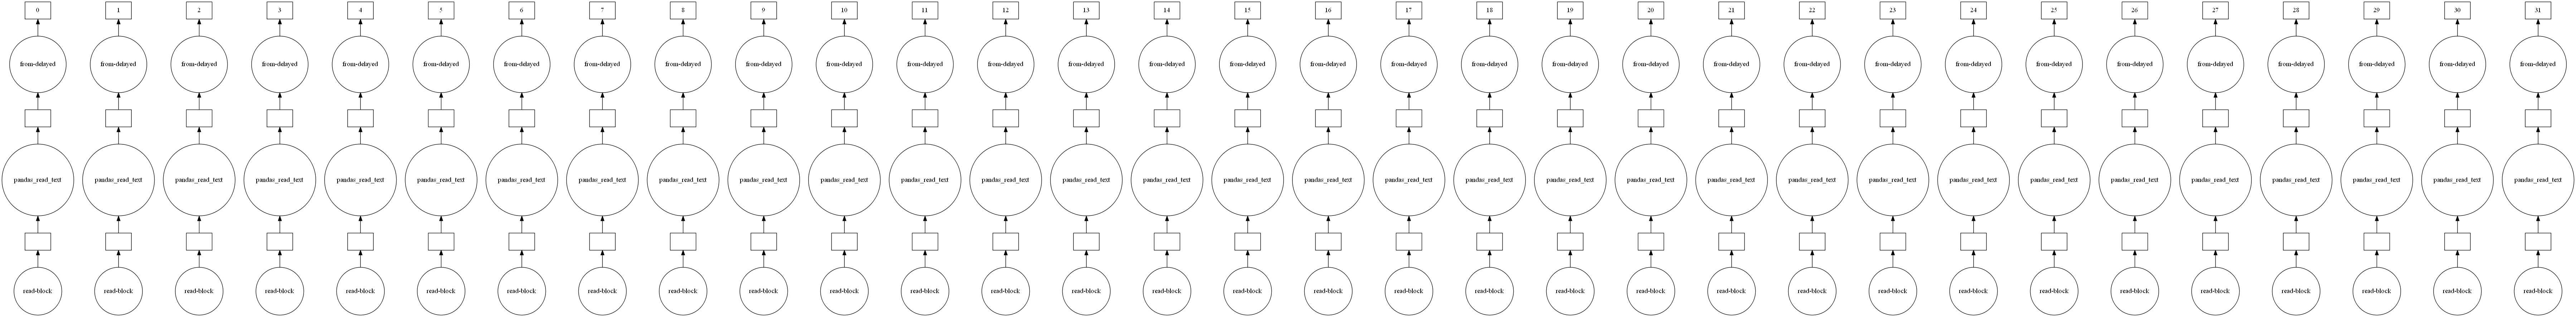

In [5]:
# However unlike Pandas, operations on dask.dataframes don't trigger immediate computation, 
# instead they add key-value pairs to an underlying Dask graph. Recall that in the diagram below, 
# circles are operations and rectangles are results.

# to see the visulaization you need to install graphviz
# pip3 install graphviz if this doesnt work please check the install_graphviz.jpg in the drive
jan_2015_dask_df.visualize()

## 3.1 Data Cleaning

* The timestamps are converted to unix so as to retrieve trip_duration & speed in MIN/HR format. Times in unix will be used while Time-Binning.
* There are total 19 features in the data. Many of them are unwanted. Below we retrieve a set of features which are useful for modelling.

In [6]:
# in the data we have time in the format "YYYY-MM-DD HH:MM:SS" we convert this string to python time format and then into unix time stamp
# https://stackoverflow.com/a/27914405
def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())

In [7]:
# we return a data frame which contains the columns
# 1.'passenger_count' : self explanatory
# 2.'trip_distance' : self explanatory
# 3.'pickup_longitude' : self explanatory
# 4.'pickup_latitude' : self explanatory
# 5.'dropoff_longitude' : self explanatory
# 6.'dropoff_latitude' : self explanatory
# 7.'total_amount' : total fair that was paid
# 8.'trip_duration' : duration of each trip
# 9.'pickup_times : pickup time converted into unix time 
# 10.'Speed' : velocity of each trip

def return_with_trip_times(df):
    
    #fits the columns into memory for faster ops
    duration_cols = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].compute()
    
    #pickups and dropoffs to unix time
    time_of_pickup = duration_cols['tpep_pickup_datetime'].apply(convert_to_unix)
    time_of_drop = duration_cols['tpep_dropoff_datetime'].apply(convert_to_unix)
    
    
    #load these cols into memory
    new_df = df[['passenger_count', 'trip_distance', 'pickup_longitude', \
                 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', \
                 'total_amount']].compute()
    
    #add small offset(0.0001) to prevent zero division
    new_df['trip_duration'] = (time_of_drop - time_of_pickup) / 60.0
    new_df['pickup_time'] = time_of_pickup
    #multiply by 60 to convert time(minutes) to time(hours)
    #this way speed will be miles/hours
    new_df['speed'] = 60.0 * (new_df['trip_distance'] / new_df['trip_duration'])
    
    return new_df

In [8]:
jan_2015_df = return_with_trip_times(jan_2015_dask_df)
jan_2015_df.head(5)

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_duration,pickup_time,speed
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421329e+09,5.285319
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420902e+09,9.983193
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420902e+09,10.746269
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420902e+09,16.071429
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420902e+09,9.318378


In [9]:
num_trips_before_removal = jan_2015_df.shape[0]
print(f"Number of trips before removing outliers : {num_trips_before_removal}")

Number of trips before removing outliers : 12748986


__<font color='blue'>NOTE</font>__<br>

* Here the trip_distance is in miles.
* Trip time is in minutes.
* speed is miles/hr.

* __<font color='blue'> We won't check for null values now, They will be removed  sequentially when we perform univariate analysis for each feature.</font>__

### 3.1.1 Pickup latitude and longitude

* It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with pickups which originate within New York.

In [ ]:
# Plotting pickup cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = jan_2015_df.loc[((jan_2015_df.pickup_longitude <= -74.15) | (jan_2015_df.pickup_latitude <= 40.5774)| \
                                     (jan_2015_df.pickup_longitude >= -73.7004) | (jan_2015_df.pickup_latitude >= 40.9176))]

# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html
# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots
map_outliers = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i, j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'], j['pickup_longitude']))).add_to(map_outliers)

map_outliers

<img src='https://i.imgur.com/APhbL7A.jpg'>

__<font color='red'>Observations</font>__<br>
* As you can see above that there are some points just outside the boundary but there are a few that are in either South america, Mexico or Canada

* Some of them are in the oceans ..

### 3.1.2 Dropoff Latitude & Dropoff Longitude

* It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with dropoffs which are within New York.

In [ ]:
# Plotting pickup cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = jan_2015_df.loc[((jan_2015_df.dropoff_longitude <= -74.15) | (jan_2015_df.dropoff_latitude <= 40.5774)| \
                                     (jan_2015_df.dropoff_longitude >= -73.7004) | (jan_2015_df.dropoff_latitude >= 40.9176))]

# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html
# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots
map_outliers = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i, j in sample_locations.iterrows():
    if int(j['dropoff_latitude']) != 0:
        folium.Marker(list((j['dropoff_latitude'], j['dropoff_longitude']))).add_to(map_outliers)

map_outliers

<img src='https://i.imgur.com/uV6oIOx.jpg'>

__<font color='red'>Observations</font>__<br>
* The observations here are similar to those obtained while analysing pickup latitude and longitude.

__<font color='green'> REMOVING THE LOACTION OUTLIERS </font>__<br>

In [12]:
num_trips_before_removal = jan_2015_df.shape[0]
jan_2015_df = jan_2015_df.loc[((jan_2015_df.dropoff_longitude >= -74.15) & (jan_2015_df.dropoff_longitude <= -73.7004) &\
                          (jan_2015_df.dropoff_latitude >= 40.5774) & (jan_2015_df.dropoff_latitude <= 40.9176)) & \
                          ((jan_2015_df.pickup_longitude >= -74.15) & (jan_2015_df.pickup_latitude >= 40.5774)& \
                          (jan_2015_df.pickup_longitude <= -73.7004) & (jan_2015_df.pickup_latitude <= 40.9176))]

print(f"Number of outliers removed using location coords : {num_trips_before_removal - jan_2015_df.shape[0]}")

Number of outliers removed using location coords : 293919


### 3.1.3 Trip Durations

* Trip_Duration = dropoff_time - pickup_time
* <font color='blue'> According to NYC Taxi & Limousine Commision Regulations the maximum allowed trip duration in a 24 hour interval is 12 hours.</font>

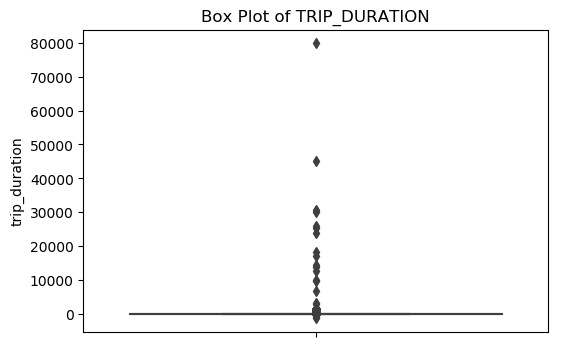

In [13]:
sns.boxplot(y='trip_duration', data=jan_2015_df)
plt.title('Box Plot of TRIP_DURATION')
plt.show()

__<font color='red'>Observations</font>__<br>
* The box plot for TRIP_DURATION is hard to interpret due to the presence of outliers.
* Let's print the percentiles instead.

In [17]:
percentiles = np.arange(1, 101)
num_p = len(percentiles)

In [18]:
trip_time_percentiles = np.percentile(jan_2015_df.trip_duration.values, percentiles)

# The 100th percentile is the outlier
print(f"100th percentile : {trip_time_percentiles[-1] :.3f} MINUTES")

100th percentile : 79925.350 MINUTES


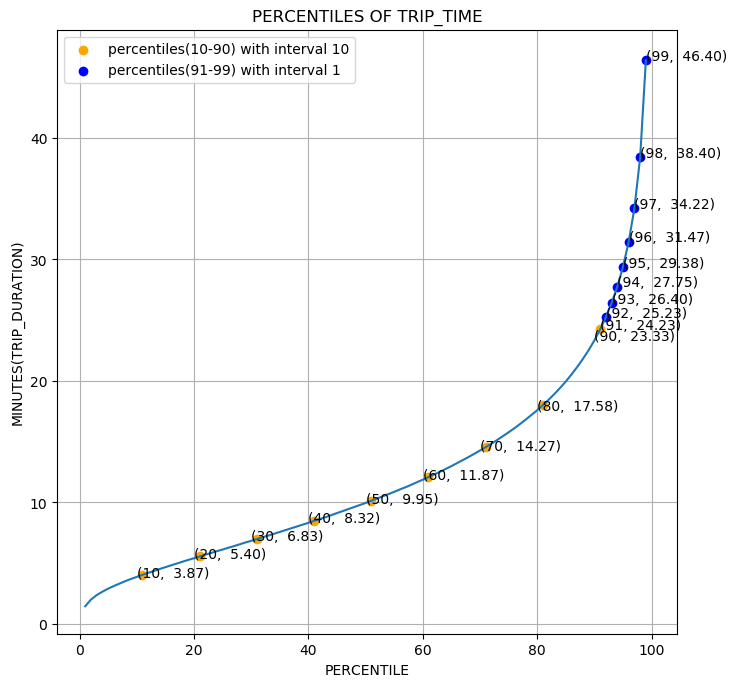

In [19]:
plt.figure(figsize=(8, 8))
plt.plot(percentiles[:-1], trip_time_percentiles[:-1])
plt.scatter(percentiles[10:-1:10], trip_time_percentiles[10:-1:10], color='orange', label='percentiles(10-90) with interval 10')
plt.scatter(percentiles[91:-1], trip_time_percentiles[91:-1], color='blue', label='percentiles(91-99) with interval 1')
plt.xlabel('PERCENTILE')
plt.ylabel('MINUTES(TRIP_DURATION)')
plt.title('PERCENTILES OF TRIP_TIME')
plt.grid()
plt.legend()

for p in range(10, num_p, 10):
    plt.annotate(s=f'({p}, {trip_time_percentiles[p-1] : .2f})', xy=(p, trip_time_percentiles[p-1]))
    
for p in range(91, num_p):
    plt.annotate(s=f'({p}, {trip_time_percentiles[p-1] : .2f})', xy=(p, trip_time_percentiles[p-1]))

__<font color='red'>Observations</font>__<br>

* The observing the percentiles, we observed that the 100th percentile is an outlier.
* <font color='blue'>50% of the trips last for 10 or fewer minutes.</font>
* <font color='blue'>99% of the trips last for 46.4 or fewer minutes.</font>

__<font color='GREEN'>REMOVING THE TRIP_DURATION OUTLIERS</font>__<br>

In [14]:
num_trips_before_removal = jan_2015_df.shape[0]
jan_2015_df = jan_2015_df.loc[(jan_2015_df.trip_duration > 0) & (jan_2015_df.trip_duration < 720)]
print(f"Number of outliers removed using trip_duration analysis : {num_trips_before_removal - jan_2015_df.shape[0]}")

Number of outliers removed using trip_duration analysis : 9213


__PDF OF TRIP_TIMES AFTER REMOVING OUTLIERS__

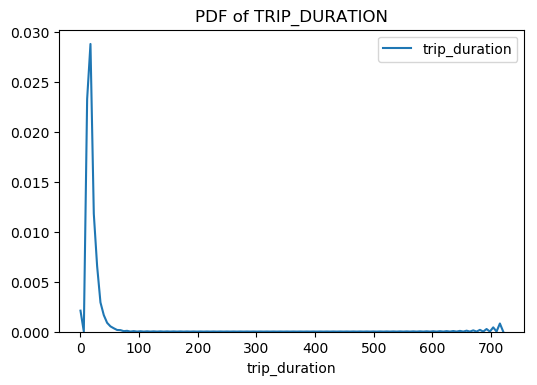

In [21]:
sns.kdeplot(jan_2015_df.trip_duration, label='trip_duration')
plt.xlabel('trip_duration')
plt.title('PDF of TRIP_DURATION')
plt.legend()
plt.show()

__<font color='red'>Observations</font>__<br>

* There is a small batch of trips for which the duration is around 700.
* The above plot looks like a log-normal distribution skewed to the left.
* Let's apply log_transform to see whether it can be converted to normal distribution.

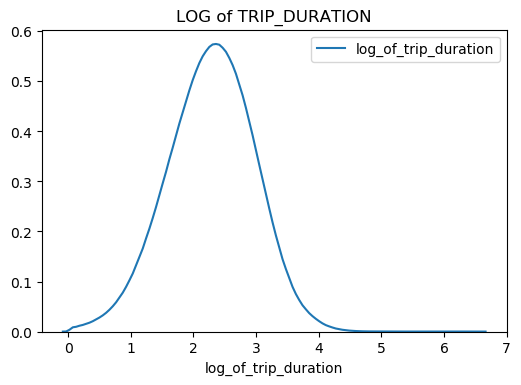

In [22]:
sns.kdeplot(np.log(jan_2015_df.trip_duration), label='log_of_trip_duration')
plt.xlabel('log_of_trip_duration')
plt.title('LOG of TRIP_DURATION')
plt.show()

* <font color='blue'>The above distribution doesn't look like a normal distribution at the tails.<br>
    It's asymmetrial, Let's verify it by plotting a Q-Q plot. </font>

In [23]:
from scipy.stats import probplot

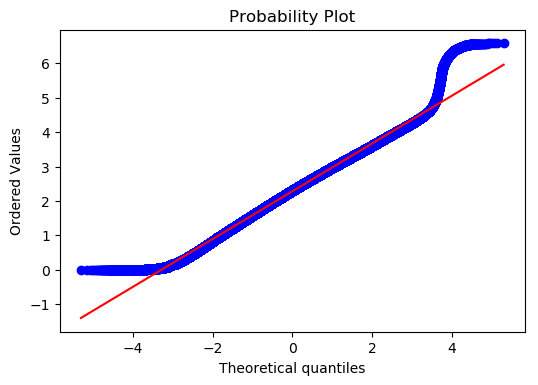

In [24]:
probplot(np.log(jan_2015_df.trip_duration.values), plot=plt)
plt.show()

* <font color='blue'>The above distribution looks like a normal distribution at the middle but not the at the ends. <br>
    Let's verify it by plotting a Q-Q plot. </font>

### 3.1.4 Speed 

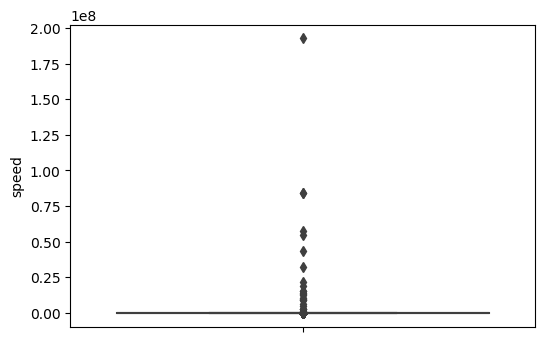

In [25]:
sns.boxplot(y='speed', data=jan_2015_df)
plt.show()

__<font color='red'>Observations</font>__<br>

* This plot too suffers from the problem of outliers.

In [26]:
speed_percentiles = np.percentile(jan_2015_df.speed.values, percentiles)
print(f"100th percentile : {speed_percentiles[-1] :.3f} MILES/HR")

100th percentile : 192857142.857 MILES/HR


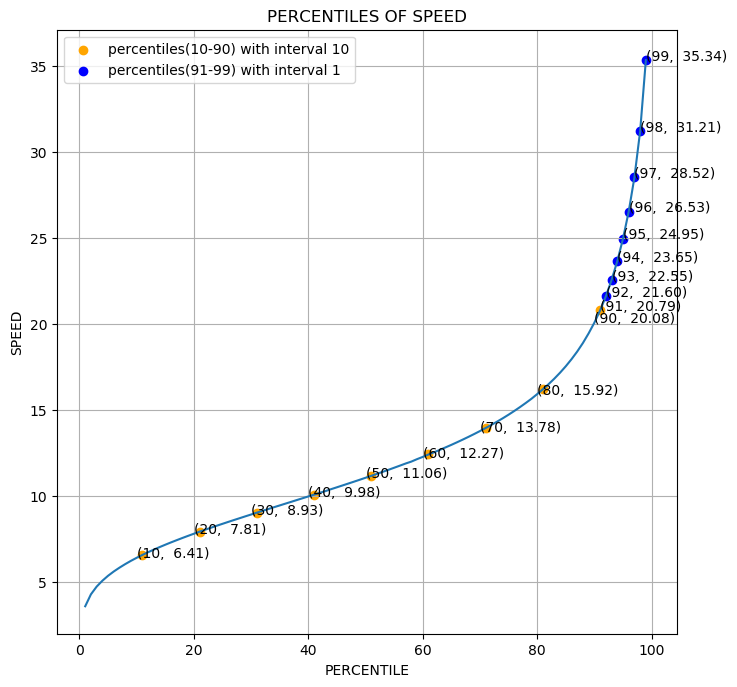

In [27]:
plt.figure(figsize=(8, 8))
plt.plot(percentiles[:-1], speed_percentiles[:-1])
plt.scatter(percentiles[10:-1:10], speed_percentiles[10:-1:10], color='orange', label='percentiles(10-90) with interval 10')
plt.scatter(percentiles[91:-1], speed_percentiles[91:-1], color='blue', label='percentiles(91-99) with interval 1')
plt.xlabel('PERCENTILE')
plt.ylabel('SPEED')
plt.title('PERCENTILES OF SPEED')

for p in range(10, num_p, 10):
    plt.annotate(s=f'({p}, {speed_percentiles[p-1] : .2f})', xy=(p, speed_percentiles[p-1]))
    
for p in range(91, num_p):
    plt.annotate(s=f'({p}, {speed_percentiles[p-1] : .2f})', xy=(p, speed_percentiles[p-1]))
    
plt.grid()
plt.legend()
plt.show()

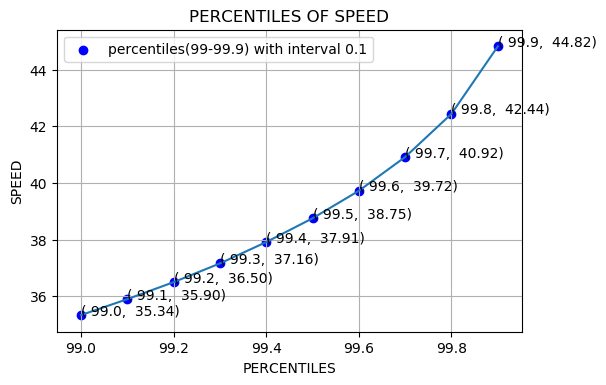

In [28]:
num_s99 = np.arange(99, 100, 0.1)
speed_99_percentiles = np.percentile(jan_2015_df.speed.values, num_s99)

plt.plot(num_s99, speed_99_percentiles)
plt.scatter(num_s99, speed_99_percentiles, color='blue', label='percentiles(99-99.9) with interval 0.1')
plt.xlabel('PERCENTILES')
plt.ylabel('SPEED')
plt.title('PERCENTILES OF SPEED')
plt.legend()
plt.grid()

for i, s in enumerate(num_s99):
    plt.annotate(s=f'({s : .1f}, {speed_99_percentiles[i] : .2f})', xy=(s, speed_99_percentiles[i]))

__<font color='red'>Observations</font>__<br>

* The observing the percentiles, we observed that the 100th percentile is an outlier.
* <font color='blue'>50% of the trips were ridden at a speed of  11 or fewer miles/hr.</font>
* <font color='blue'>99.9% of the trips were ridden at a speed of 44.82 or fewer miles/hr.</font>

__<font color='blue'>The Average DISTANCE travelled  by a cab per 10 MIN :  2.07 MILES</font>__

__<font color='green'>REMOVING THE OUTLIERS</font>__<br>

In [15]:
num_trips_before_removal = jan_2015_df.shape[0]
jan_2015_df = jan_2015_df.loc[(jan_2015_df.speed > 0) & (jan_2015_df.speed < 65)]
print(f"Number of outliers removed after speed analysis : {num_trips_before_removal - jan_2015_df.shape[0]}")

Number of outliers removed after speed analysis : 54362


### 3.1.5 Trip Distance

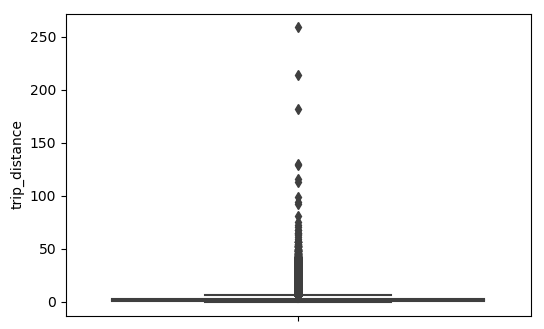

In [30]:
sns.boxplot(y='trip_distance', data=jan_2015_df)
plt.show()

__<font color='red'>Observations</font>__<br>

* Outliers...  Outliers...  Outliers...

In [31]:
distance_percentiles = np.percentile(jan_2015_df.trip_distance.values, percentiles)

print(f'100th percentile : {distance_percentiles[-1]} MILES')

100th percentile : 258.9 MILES


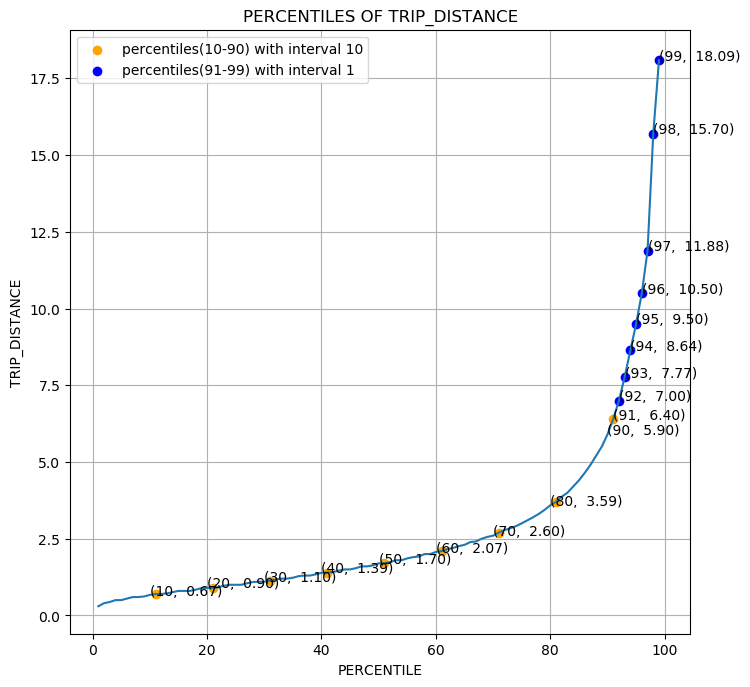

In [32]:
plt.figure(figsize=(8, 8))
plt.plot(percentiles[:-1], distance_percentiles[:-1])
plt.scatter(percentiles[10:-1:10], distance_percentiles[10:-1:10], color='orange', label='percentiles(10-90) with interval 10')
plt.scatter(percentiles[91:-1], distance_percentiles[91:-1], color='blue', label='percentiles(91-99) with interval 1')
plt.xlabel('PERCENTILE')
plt.ylabel('TRIP_DISTANCE')
plt.title('PERCENTILES OF TRIP_DISTANCE')

for p in range(10, num_p, 10):
    plt.annotate(s=f'({p}, {distance_percentiles[p-1] : .2f})', xy=(p, distance_percentiles[p-1]))
    
for p in range(91, num_p):
    plt.annotate(s=f'({p}, {distance_percentiles[p-1] : .2f})', xy=(p, distance_percentiles[p-1]))
    
plt.grid()
plt.legend()
plt.show()

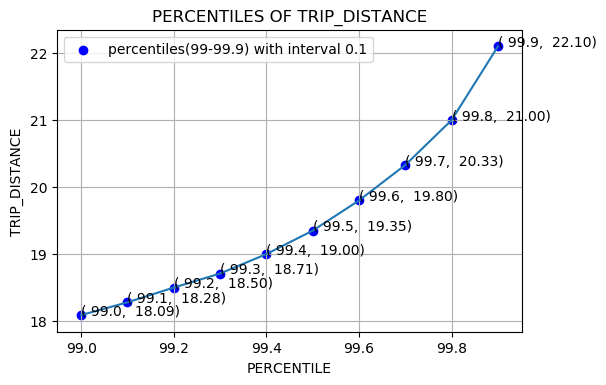

In [33]:
num_d99 = np.arange(99, 100, 0.1)
dist_99_percentiles = np.percentile(jan_2015_df.trip_distance.values, num_d99)

plt.plot(num_d99, dist_99_percentiles)
plt.scatter(num_d99, dist_99_percentiles, color='blue', label='percentiles(99-99.9) with interval 0.1')
plt.xlabel('PERCENTILE')
plt.ylabel('TRIP_DISTANCE')
plt.title('PERCENTILES OF TRIP_DISTANCE')
plt.legend()
plt.grid()

for i, s in enumerate(num_d99):
    plt.annotate(s=f'({s : .1f}, {dist_99_percentiles[i] : .2f})', xy=(s, dist_99_percentiles[i]))

__<font color='red'>Observations</font>__<br>

* The observing the percentiles, we observed that the 100th percentile is an outlier.
* <font color='blue'>50% of the trips's distances at a speed of 1.7 or fewer MILES</font>
* <font color='blue'>99.9% of the trips's distances at a speed of 22 or fewer MILES.</font>

__<font color='green'>REMOVING THE OUTLIERS</font>__<br>

In [16]:
num_trips_before_removal = jan_2015_df.shape[0]
jan_2015_df = jan_2015_df.loc[(jan_2015_df.trip_distance > 0) & (jan_2015_df.trip_distance < 23)]
print(f"Number of outliers removed after trip_speed analysis : {num_trips_before_removal - jan_2015_df.shape[0]}")

Number of outliers removed after trip_speed analysis : 8141


### 3.1.6 Total Fare

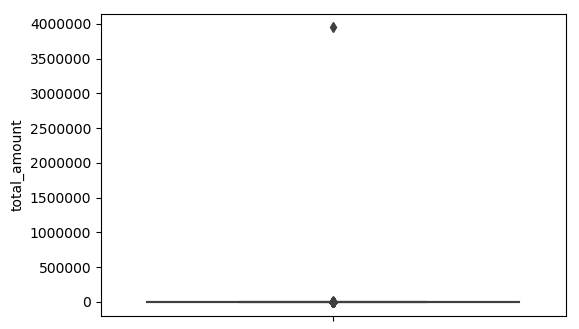

In [36]:
sns.boxplot(y='total_amount', data=jan_2015_df)
plt.show()

__<font color='red'>Observations</font>__<br>

* Outliers...  Outliers...  Outliers...  :(

In [37]:
fare_percentiles = np.percentile(jan_2015_df.total_amount.values, percentiles)

print(f'100th percentile : {fare_percentiles[-1]}$')

100th percentile : 3950611.6$


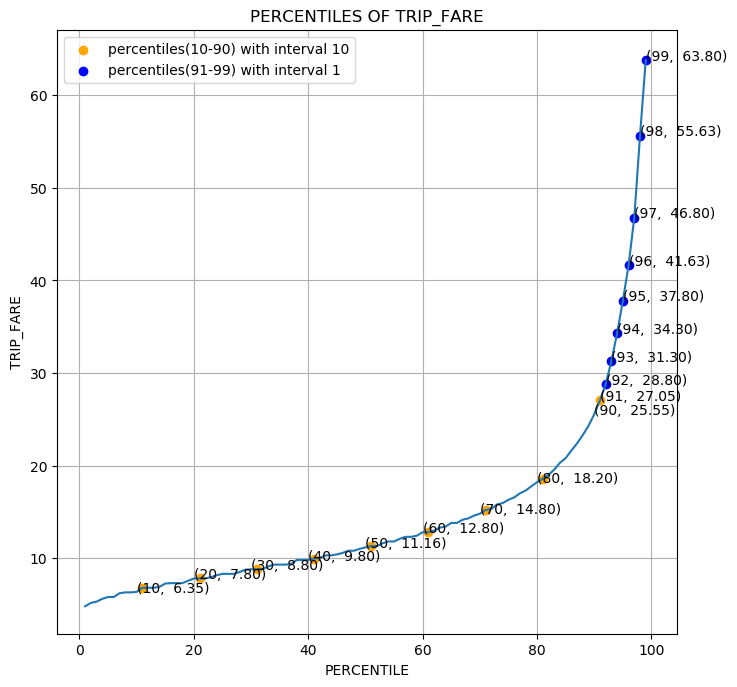

In [38]:
plt.figure(figsize=(8, 8))
plt.plot(percentiles[:-1], fare_percentiles[:-1])
plt.scatter(percentiles[10:-1:10], fare_percentiles[10:-1:10], color='orange', label='percentiles(10-90) with interval 10')
plt.scatter(percentiles[91:-1], fare_percentiles[91:-1], color='blue', label='percentiles(91-99) with interval 1')
plt.xlabel('PERCENTILE')
plt.ylabel('TRIP_FARE')
plt.title('PERCENTILES OF TRIP_FARE')

for p in range(10, num_p, 10):
    plt.annotate(s=f'({p}, {fare_percentiles[p-1] : .2f})', xy=(p, fare_percentiles[p-1]))
    
for p in range(91, num_p):
    plt.annotate(s=f'({p}, {fare_percentiles[p-1] : .2f})', xy=(p, fare_percentiles[p-1]))
    
plt.grid()
plt.legend()
plt.show()

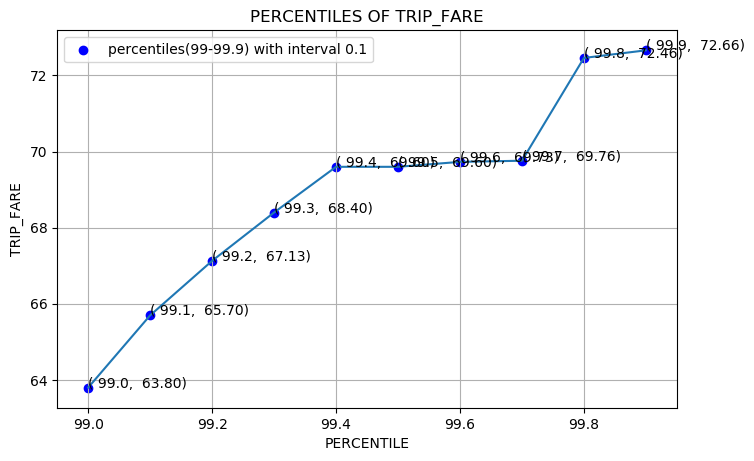

In [39]:
num_f99 = np.arange(99, 100, 0.1)
fare_99_percentiles = np.percentile(jan_2015_df.total_amount.values, num_f99)

plt.figure(figsize=(8, 5))
plt.plot(num_f99, fare_99_percentiles)
plt.scatter(num_f99, fare_99_percentiles, color='blue', label='percentiles(99-99.9) with interval 0.1')
plt.xlabel('PERCENTILE')
plt.ylabel('TRIP_FARE')
plt.title('PERCENTILES OF TRIP_FARE')
plt.legend()
plt.grid()

for i, s in enumerate(num_f99):
    plt.annotate(s=f'({s : .1f}, {fare_99_percentiles[i] : .2f})', xy=(s, fare_99_percentiles[i]))

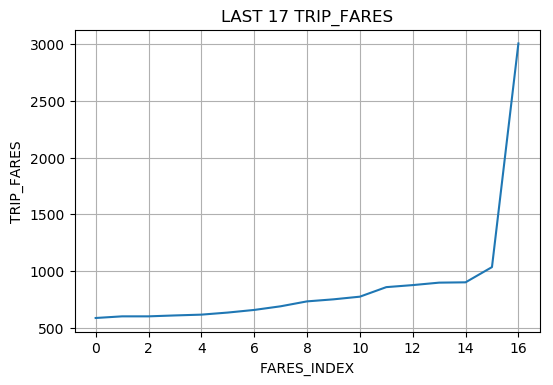

In [40]:
fare_values = jan_2015_df.total_amount.values
fare_values.sort()
plt.plot(fare_values[-19:-2])
plt.title('LAST 17 TRIP_FARES')
plt.xlabel('FARES_INDEX')
plt.ylabel('TRIP_FARES')
plt.grid()

__<font color='red'>Observations</font>__<br>

* From the above plot, we see a sudden increase in fares at 100 dollars.<br> So anything above 1000 dollars is an outlier.

* The 100th percentile is the outlier with value = 3950611.6 dollars

* <font color='blue'> 50% of the trips were paid 11.16 or fewer dollars. </font>

* <font color='blue'> 99.9% of the trips were paid 72.66 or fewer dollars. </font>

__<font color='green'>REMOVE THE OUTLIER TRIPS </font>__<br>

In [17]:
num_trips_before_removal = jan_2015_df.shape[0]
jan_2015_df = jan_2015_df.loc[(jan_2015_df.total_amount > 0) & (jan_2015_df.total_amount < 1000)]
print(f"Number of outliers removed after trip_fare analysis : {num_trips_before_removal - jan_2015_df.shape[0]}")

Number of outliers removed after trip_fare analysis : 2928


### <font color='green'> 3.1.7 TOTAL NUMBER OF OUTLIERS REMOVED </font><br>

In [18]:
num_trips = len_df
num_trips_after_removal = jan_2015_df.shape[0]
num_trips_removed = num_trips - jan_2015_df.shape[0]
print(f"Number of trips before removal : {num_trips}")
print(f"Number of trips after removal  : {num_trips_after_removal}")
print(f"Number of trips removed        : {num_trips_removed} ({(100*num_trips_removed)/num_trips : .3f}%)")

Number of trips before removal : 12748986
Number of trips after removal  : 12380423
Number of trips removed        : 368563 ( 2.891%)


## 3.2 Data preperation

* Our task at hand is to predict the #pickups given a region and some time_interval.
* So We've to derive regions, time_intervals from the data.

### 3.2.1 Clustering/Segmentation of NYC into Regions

* Here We'll seperate the NYC into K clusters using the latitude and longitude of pickups.

* We'll use KMeans to cluster the data into regions.
    
* Kmeans tries to create clusters of roughly same sizes(clusters of same number of points).

* The regions with more #pickups get connected into smaller  and tighter/dense clusters <br>
While regions with less #pickups get connected into larger and loose/sparse clusters. 

* <font color='blue'>We want the inter-cluster distance(distance between the cluster centers) to be <= 2 MILES.<br>
    This is because the trip_data says that a taxi can cover 2 MILES in 10 MIN.</font>
    
* <font color='blue'>We've to make sure that the inter-cluster distance isn't too small < 0.5 MILES. </font>
    
* <font color='blue'>We've to find the value of K which satisfies the constraint { 0.5 MILES <= inter-cluster distance <= 2 MILES }</font>

In [19]:
from sklearn.cluster import MiniBatchKMeans

In [20]:
def find_clusters(k, coords, predict_on_df=None):
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=10000, random_state=42).fit(coords)
    
    if predict_on_df is not None:
        pickup_clusters = kmeans.predict(predict_on_df[['pickup_latitude', 'pickup_longitude']])
        return kmeans.cluster_centers_, pickup_clusters
        
    return kmeans.cluster_centers_

def find_min_distance(centers):
    
    num_clusters = len(centers)
    min_inter_cluster_dist = 1000 #init this var to 1000 to find the min icd
    
    # Matrix stores whether the cluster_dist <= 2 or >= 2 
    # 1 if cluster_dist <= 2 else 0
    distances_bool = np.zeros((num_clusters, num_clusters))  
    
    for i in range(num_clusters):
        for j in range(num_clusters):
            if i != j:
                #returns distance in metres
                cluster_dist = haversine_distance(centers[i][0], centers[i][1], centers[j][0], centers[j][1])
                cluster_dist = cluster_dist/(1000 * 1.60934) #convert to kms and then miles(1 MILE = 1.60934 KM)
                min_inter_cluster_dist = min(min_inter_cluster_dist, cluster_dist)
                
                if cluster_dist <= 2:
                    distances_bool[i, j] = 1
                    
                else:
                    distances_bool[i, j] = 0
                
    num_clusters_lt_two = np.round((distances_bool == 1).sum()/len(distances_bool))
    num_clusters_gt_two = num_clusters - np.round((distances_bool == 1).sum()/len(distances_bool))
    print(f"Number of Clusters                  : {num_clusters}")
    print(f"Number of clusters with in 2M range : {num_clusters_lt_two}")
    print(f"Number of cluster out of 2M range   : {num_clusters_gt_two}")
    print(f"Min Inter_Cluster_Distance          : {min_inter_cluster_dist : 4f}")
    
    return (num_clusters, num_clusters_lt_two, num_clusters_gt_two, np.round(min_inter_cluster_dist, 4))

In [21]:
position_coords = jan_2015_df[['pickup_latitude', 'pickup_longitude']].values

values = []
for k in range(30, 71, 5):
    cluster_centers = find_clusters(k, position_coords)
    values.append(find_min_distance(cluster_centers))
    print("-"*80)

Number of Clusters                  : 30
Number of clusters with in 2M range : 7.0
Number of cluster out of 2M range   : 23.0
Min Inter_Cluster_Distance          :  0.475971
--------------------------------------------------------------------------------
Number of Clusters                  : 35
Number of clusters with in 2M range : 7.0
Number of cluster out of 2M range   : 28.0
Min Inter_Cluster_Distance          :  0.438831
--------------------------------------------------------------------------------
Number of Clusters                  : 40
Number of clusters with in 2M range : 10.0
Number of cluster out of 2M range   : 30.0
Min Inter_Cluster_Distance          :  0.390218
--------------------------------------------------------------------------------
Number of Clusters                  : 45
Number of clusters with in 2M range : 10.0
Number of cluster out of 2M range   : 35.0
Min Inter_Cluster_Distance          :  0.393612
-----------------------------------------------------------

In [22]:
values = np.array(values)

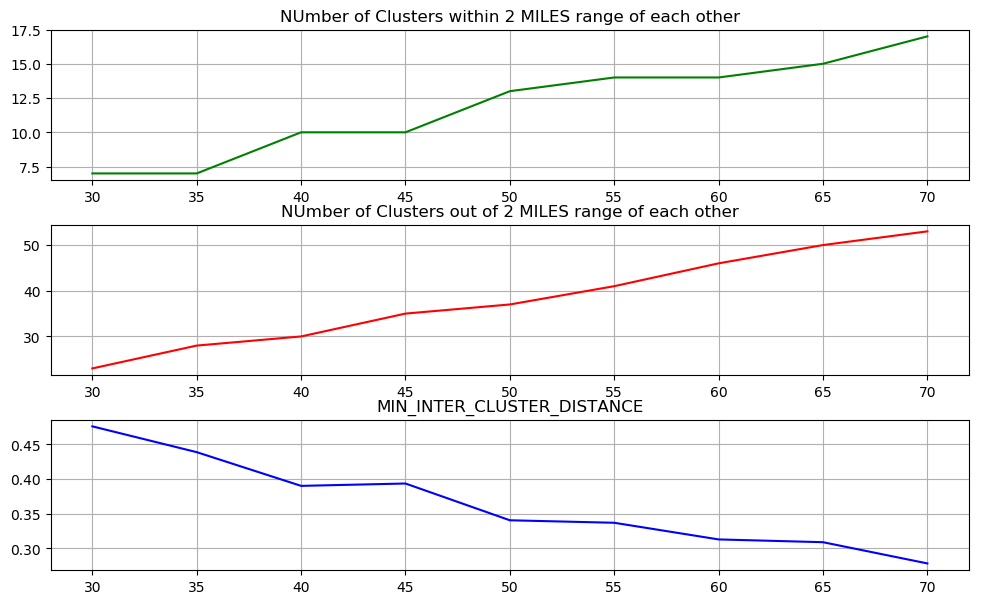

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6))
fig.tight_layout()
ax1.plot(values[:, 0], values[:, 1], label='K <= 2M', color='green')
ax1.set_xticks(values[:, 0])
ax1.set_title('NUmber of Clusters within 2 MILES range of each other')
ax1.grid()

ax2.plot(values[:, 0], values[:, 2], label='K >= 2M', color='red')
ax2.set_xticks(values[:, 0])
ax2.set_title('NUmber of Clusters out of 2 MILES range of each other')
ax2.grid()

ax3.plot(values[:, 0], values[:, 3], label='min_inter_cluster_dist', color='blue')
ax3.set_xticks(values[:, 0])
ax3.set_title('MIN_INTER_CLUSTER_DISTANCE')
ax3.grid()

    
plt.show()

* __<font color='blue'> Number of Clusters=30 seems to be an optimal one with inter_cluster_distance closer to 0.5. </font>__

__<font color='green'>PLOTTING THE CLUSTER CENTRES</font>__

In [24]:
kmeans = MiniBatchKMeans(n_clusters=30, batch_size=10000, random_state=42).fit(jan_2015_df[['pickup_latitude', 'pickup_longitude']].values)
jan_2015_df['pickup_cluster'] = kmeans.predict(jan_2015_df[['pickup_latitude', 'pickup_longitude']])

In [25]:
filename = 'kmeans.pkl'
if not os.path.isfile(filename):
    print('Saving to Disk...')
    with open(filename, 'wb') as f:
        pickle.dump(kmeans, f)
else:
    print("Loading from Disk..")
    kmeans = pickle.load(filename)

Saving to Disk...


In [26]:
cluster_centers = kmeans.cluster_centers_
num_clusters = len(cluster_centers)

In [ ]:
# Plotting the cluster centers on OSM
map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')
for i in range(num_clusters):
    folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])), popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm

<img src='https://i.imgur.com/8sXl3Rc.jpg'>

In [28]:
#Visualising the clusters on a map
def plot_clusters(frame):
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    fig, ax = plt.subplots(ncols=1, nrows=1, dpi=150)
    ax.set_title('Clustered Regions')
    ax.scatter(frame.pickup_longitude.values[:500000], frame.pickup_latitude.values[:500000], s=10, lw=0,
               c=frame.pickup_cluster.values[:500000], cmap='tab20', alpha=0.2)
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

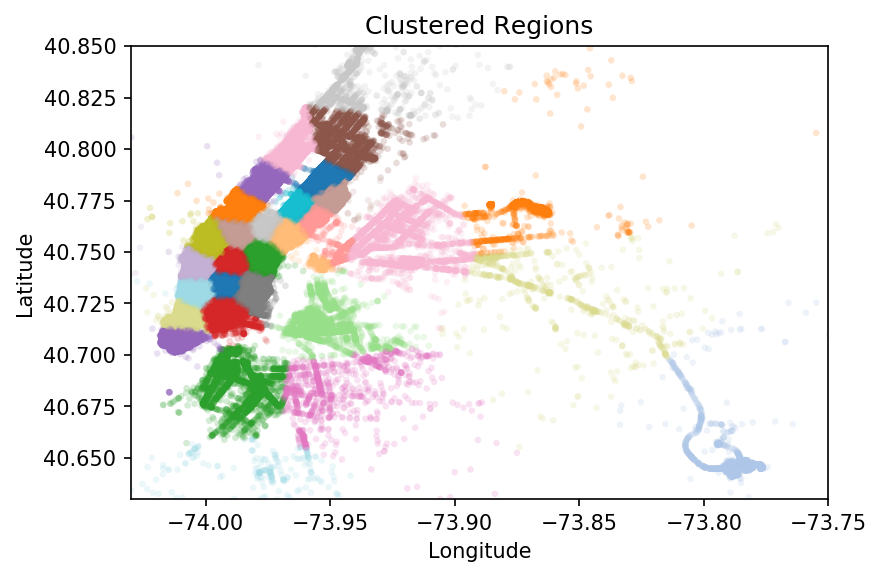

In [29]:
plot_clusters(jan_2015_df)

### 3.2.2 Time Binning

* We've clusteres NYC ino regions. Let's also seperate the time into 10 min intervals.

* The unix timestamp can be easily broken into timestamps. <font color='blue'> 10 min bin = (unix_timestamp + 600seconds) </font>

In [30]:
def add_pickup_bins(df, month, year):
    
    #Refer:https://www.unixtimestamp.com/
    # 1420070400 : 2015-01-01 00:00:00 
    # 1422748800 : 2015-02-01 00:00:00 
    # 1425168000 : 2015-03-01 00:00:00
    # 1427846400 : 2015-04-01 00:00:00 
    # 1430438400 : 2015-05-01 00:00:00 
    # 1433116800 : 2015-06-01 00:00:00

    # 1451606400 : 2016-01-01 00:00:00 
    # 1454284800 : 2016-02-01 00:00:00 
    # 1456790400 : 2016-03-01 00:00:00
    # 1459468800 : 2016-04-01 00:00:00 
    # 1462060800 : 2016-05-01 00:00:00 
    # 1464739200 : 2016-06-01 00:00:00

    
    unix_times = [[1420070400, 1422748800, 1425168000, 1427846400, 1430438400, 1433116800],\
                    [1451606400, 1454284800, 1456790400, 1459468800, 1462060800, 1464739200]]

    #use this time as the reference point to bin the timestamps 
    start_pickup_unix = unix_times[year - 2015][month - 1]
    #divide the timestamp by 600 to convert into 10min bin and add 33 to convert it from gmt to est
    df['pickup_bins'] = df.pickup_time.apply(lambda x : int((x - start_pickup_unix)/600) + 33)
    
    return df

In [31]:
jan_2015_df = add_pickup_bins(jan_2015_df, 1, 2015)
jan_2015_df.head(5)

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_duration,pickup_time,speed,pickup_cluster,pickup_bins
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421329e+09,5.285319,24,2130
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420902e+09,9.983193,29,1419
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420902e+09,10.746269,19,1419
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420902e+09,16.071429,25,1419
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420902e+09,9.318378,23,1419


In [32]:
jan_2015_df_groupby = jan_2015_df[['pickup_cluster', 'pickup_bins', 'trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()

In [33]:
num_time_bins = jan_2015_df.pickup_bins.unique().shape[0]
print(f"Number of possible 10min interval bins           : {num_time_bins}")
print(f'Total number of pickup_bins from clusters        : {jan_2015_df_groupby.trip_distance.shape[0]}')
print(f"Number of possible pickup_bins from all clusters : {num_time_bins*num_clusters}")

Number of possible 10min interval bins           : 4464
Total number of pickup_bins from clusters        : 130497
Number of possible pickup_bins from all clusters : 133920


__<font color='GREEN'>NOTE : </font>__

* <font color='blue'>Here trip_distance corresponds to the number of pickups in the respective pickup_bin for a cluster.</font>

In [40]:
def remove_outliers(df):
    
    num_trips_before_removal = df.shape[0]
    print(f"Number of trip before removing the outliers : {num_trips_before_removal}")
    #------------------------NYC outliers---------------------------------------------
    df = df.loc[((df.dropoff_longitude >= -74.15) & (df.dropoff_longitude <= -73.7004) &\
                (df.dropoff_latitude >= 40.5774) & (df.dropoff_latitude <= 40.9176)) & \
                ((df.pickup_longitude >= -74.15) & (df.pickup_latitude >= 40.5774)& \
                (df.pickup_longitude <= -73.7004) & (df.pickup_latitude <= 40.9176))]
    
    #num_trips_after_outliers_rem = df.shape[0]
    #print(f"Number of trip before removing the outliers : {num_trips_before_removal}")
    
    #------------------------TRIP_TIME OUTLIERS----------------------------------------
    df = df.loc[(df.trip_duration > 0) & (df.trip_duration < 720)]
    
    #-----------------------TRIP_DISTANCE OUTLIERS------------------------------------
    df = df.loc[(df.trip_distance > 0) & (df.trip_distance < 23)]
    
    #-----------------------SPEED OUTLIERS--------------------------------------------
    df = df.loc[(df.speed > 0) & (df.speed < 65)]
    
    #-----------------------FARE OUTLIERS---------------------------------------------
    df = df.loc[(df.total_amount > 0) & (df.total_amount < 1000)]
    
    num_trips_after_removal = df.shape[0]
    per = (num_trips_before_removal - num_trips_after_removal) / num_trips_before_removal
    print(f'Number of outliers removed : {(num_trips_before_removal - num_trips_after_removal)} ({per*100 : .3f}%)')
    
    return df
    
def data_format(df, month, year, kmeans):
    
    df = return_with_trip_times(df)
    df = remove_outliers(df)
    df['pickup_cluster'] = kmeans.predict(df[['pickup_latitude', 'pickup_longitude']])
    df = add_pickup_bins(df, month, year)
    df_groupby = df[['pickup_cluster', 'pickup_bins', 'trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()
    
    return df, df_groupby

In [41]:
#jan_2015_dask_df = dd.read_csv('yellow_tripdata_2015-01.csv')
jan_2016_dask_df = dd.read_csv('yellow_tripdata_2016-01.csv')
feb_2016_dask_df = dd.read_csv('yellow_tripdata_2016-02.csv')
mar_2016_dask_df = dd.read_csv('yellow_tripdata_2016-03.csv')

In [36]:
#jan_2015_df, jan_2015_df_groupby = data_format(jan_2015_dask_df, 1, 2015, kmeans)

In [37]:
jan_2016_df, jan_2016_df_groupby = data_format(jan_2016_dask_df, 1, 2016, kmeans)

Number of trip before removing the outliers : 10906858
Number of outliers removed : 290668 ( 2.665%)


In [38]:
feb_2016_df, feb_2016_df_groupby = data_format(feb_2016_dask_df, 2, 2016, kmeans)

Number of trip before removing the outliers : 11382049
Number of outliers removed : 301298 ( 2.647%)


In [39]:
mar_2016_df, mar_2016_df_groupby = data_format(mar_2016_dask_df, 3, 2016, kmeans)

Number of trip before removing the outliers : 12210952
Number of outliers removed : 318144 ( 2.605%)


### 3.2.3 Smoothing

* <font color='blue'> The #pickups in some pickup_bins are zero(pickups aren't present for some bins). predicting zero pickups is not useful in practice. <font>
* <font color='blue'> We'll perform smoothing over the 10min interval pickups. This is only performed on Jan 2015 trip_data(used for training). <font>

In [42]:
def get_cluster_pickup_bins(df):
    
    return list(map(lambda idx : np.sort(df[df.pickup_cluster == idx].pickup_bins.unique()).tolist(),\
                list(range(df.pickup_cluster.max()+1))))

#number of bins with zero_pickups 
def get_num_zero_bins(cluster_pickup_bins):
    return list(map(lambda x : num_time_bins - len(x), cluster_pickup_bins))

In [43]:
#get pickup_bins for each cluster
jan_2015_cluster_pickup_bins = get_cluster_pickup_bins(jan_2015_df)
#get number of zero bins for each cluster
jan_2015_cluster_zero_bins = get_num_zero_bins(jan_2015_cluster_pickup_bins)

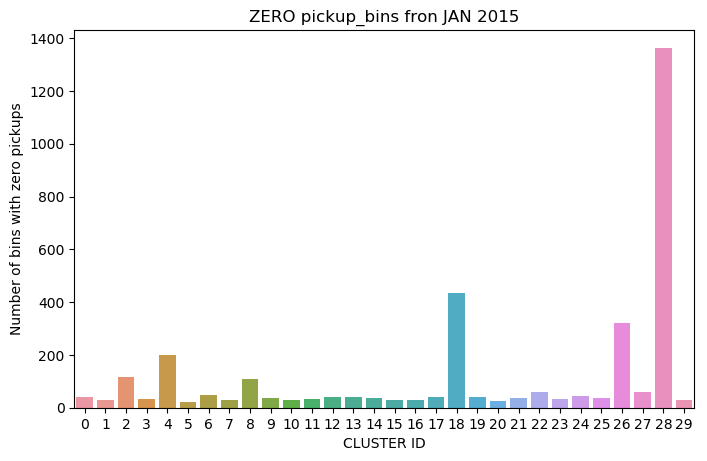

In [44]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(list(range(30)), jan_2015_cluster_zero_bins)
plt.xlabel('CLUSTER ID')
plt.ylabel('Number of bins with zero pickups')
plt.title('ZERO pickup_bins fron JAN 2015')
plt.show()

* <font color='blue'>There are two ways to fill up zero pickup_bin values.</font>
<ul>
<li> Fill the missing value with 0's.</li>
<li> Fill the missing values with the avg values.<br> The idea is to distribute values from adjacent bins over a range.
<ul><br>
<li> <font color='blue'> Case 1:(values missing at the start)  </font><br>Ex1: M, M, M, x =>ceil(x/4), ceil(x/4), ceil(x/4), ceil(x/4) <br> Ex2: M, M, x => ceil(x/3), ceil(x/3), ceil(x/3) </li><br>
<li> <font color='blue'> Case 2:(values missing in middle) </font><br>Ex1: x, M, M, y => ceil((x+y)/4), ceil((x+y)/4), ceil((x+y)/4), ceil((x+y)/4) <br> Ex2: x, M, M, M, y => ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5) </li><br>
<li> <font color='blue'> Case 3:(values missing at the end)  </font><br>Ex1: x, M, M, M  => ceil(x/4), ceil(x/4), ceil(x/4), ceil(x/4) <br> Ex2: x, M  => ceil(x/2), ceil(x/2) </li>
</ul>
</li>
</ul>

__<font color='blue'> FILL MISSING BINS WITH 0's </font>__

In [45]:
def fill_missing_bins(bin_counts, cluster_bins,\
                      num_clusters=len(jan_2015_cluster_pickup_bins),\
                      num_time_bins=num_time_bins):
    
    smoothed_bins = [] #list to store all the cluster_bins
    idx = 0 #used to iterate over the array with pickup_bins != 0
    for cluster in range(num_clusters):
        smoothed_clusters = []
        for time_bin in range(num_time_bins):
            if time_bin in cluster_bins[cluster]:
                smoothed_clusters.append(bin_counts[idx])
                idx += 1
            else:
                smoothed_clusters.append(0)
        smoothed_bins += smoothed_clusters
    
    return np.array(smoothed_bins)

In [46]:
jan_2015_bin_counts_filled = fill_missing_bins(jan_2015_df_groupby.trip_distance.values, jan_2015_cluster_pickup_bins)

In [47]:
cluster_zero_bins = [] 

for cluster in range(len(jan_2015_cluster_pickup_bins)):
    cluster_zero_bins.append(list(filter(lambda x : x not in jan_2015_cluster_pickup_bins[cluster], list(range(num_time_bins)))))

__<font color='blue'> AVERAGE SMOOTHING </font>__

* The idea is to fill the missing bins with zeros.
* Then retrieve the indices where the bin is zero
* Then find the zero_run(starting_idx of consecutive zeros) indices.
    - [0, 1, 1, 5, 0, 0, 0, 5, 6, 0] ==> {0 : 1, 4 : 3, 9 : 1}
* Then perform smoothing using that zero_run indices.

In [48]:
#A recursive function to get the number 0f zero_runs
#(zero_start_index, array) ==> function ==> {number of consecutive zeros from the start index}
#[0, 1, 1, 5, 0, 0, 0, 5, 6] ==> {0 : 1, 4 :, 3}
def find_zero_runs(idx, array):
    
    #add 1 if True esle 0 and exit
    while array[idx] == 0:
        return 1 + find_zero_runs(idx+1, array)
    else:
        return 0

In [49]:
def avg_smoothing(bin_counts, cluster_bins):
    
    #-------------FILL MISSING BINS with 0's------------------
    print('Filling missing pickup_bins with zeros...')
    bin_counts = fill_missing_bins(bin_counts, cluster_bins)
    
    #------------------FIND ZERO INDICES----------------------
    print('finding zero indices...')
    zero_indices = np.where(bin_counts == 0)[0]
    
    #------------------FIND ZERO RUNS-------------------------
    print('Finding zero runs...')
    zero_runs_dict = {}
    idx = 0  #pointer to zero_runs start_idx
    for z in zero_indices:
        #if c > 1, then iterate over the loop without computation
        #jump to the next zero_run index
        if idx == 0:
            c = find_zero_runs(z, bin_counts)
            zero_runs_dict[z] = c
            #print(f"({z}, {c})")
            idx = c
        idx -= 1
        
    #------------------SMOOTHING USING ZERO RUNS------------------------------
    print('Smoothing using zero runs...')
    for idx in zero_runs_dict.keys():
        #begininng of new cluster
        if idx % num_time_bins == 0:
            start_idx = max(0, idx)  # pad the left index
            end_idx =  min(idx + zero_runs_dict[idx] + 1, len(bin_counts)) #pad the right index
            span = end_idx - start_idx #span is the num_zeros + (2 (or) 1)
            #print("boundary case ==> ", start_idx, end_idx)
            #calculate the average over the span, then distribute to respective elements
            #and assign to the indices
            bin_counts[start_idx : end_idx] = np.ones(span) * np.ceil(bin_counts[start_idx : end_idx].sum() / span)
        
        else:
            start_idx = max(0, idx - 1)  # pad the left index
            end_idx =  min(idx + zero_runs_dict[idx] + 1, len(bin_counts)) #pad the right index
            span = end_idx - start_idx
            #print(start_idx, end_idx)
            bin_counts[start_idx : end_idx] = np.ones(span) * np.ceil(bin_counts[start_idx : end_idx].sum() / span)
        
    print('Done...')

    return bin_counts

In [50]:
jan_2015_bin_counts_smoothed = avg_smoothing(jan_2015_df_groupby.trip_distance.values, jan_2015_cluster_pickup_bins)

Filling missing pickup_bins with zeros...
finding zero indices...
Finding zero runs...
Smoothing using zero runs...
Done...


__<font color='blue'> VERIFICATION  </font>__

In [51]:
#cluster boundary case
print(f"BEFORE smoothing : {jan_2015_bin_counts_filled[4460:4470]}")
print(f"AFTER  smoothing : {jan_2015_bin_counts_smoothed[4460:4470]}")

BEFORE smoothing : [316 296 292 282   0  51 103 116 132 119]
AFTER  smoothing : [316 296 292 282  26  26 103 116 132 119]


In [85]:
#somewhere in the middle
print(f"BEFORE smoothing : {jan_2015_bin_counts_filled[3787:3794]}")
print(f"AFTER  smoothing : {jan_2015_bin_counts_smoothed[3787:3794]}")

BEFORE smoothing : [1 2 0 0 3 2 2]
AFTER  smoothing : [1 2 2 2 2 2 2]


In [53]:
#cluster 1 start
print(f"BEFORE smoothing : {jan_2015_bin_counts_filled[:5]}")
print(f"AFTER  smoothing : {jan_2015_bin_counts_smoothed[:5]}")

BEFORE smoothing : [  0 135 198 281 256]
AFTER  smoothing : [ 68  68 198 281 256]


In [86]:
print(f"Number of 10 MIN interval pickup_bins from all the clusters : {jan_2015_bin_counts_filled.shape[0]}")

Number of 10 MIN interval pickup_bins from all the clusters : 133920


__<font color='blue'> Number of 10 MIN interval pickup_bins from all the clusters : 133920</font>__

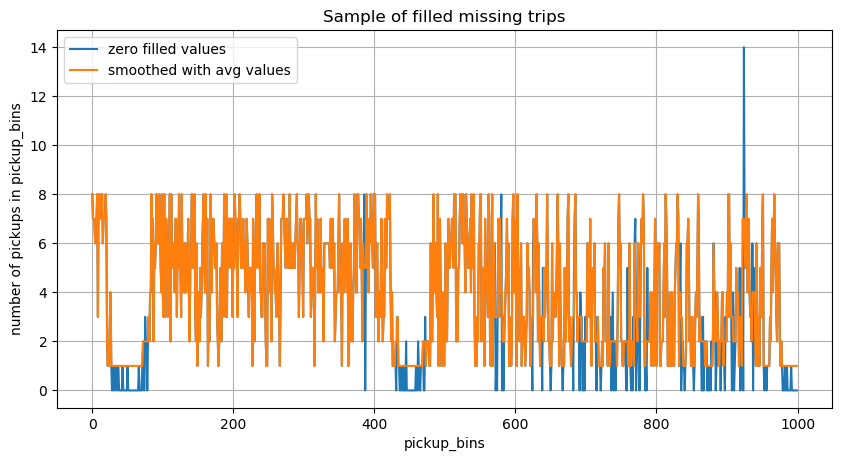

In [83]:
plt.figure(figsize=(10,5))
plt.plot(jan_2015_bin_counts_filled[jan_2015_bin_counts_smoothed <= 8][:1000], label="zero filled values")
plt.plot(jan_2015_bin_counts_smoothed[jan_2015_bin_counts_smoothed <= 8][:1000], label="smoothed with avg values")
plt.xlabel('pickup_bins' )
plt.ylabel('number of pickups in pickup_bins')
plt.title('Sample of filled missing trips')
plt.grid()
plt.legend()
plt.show()

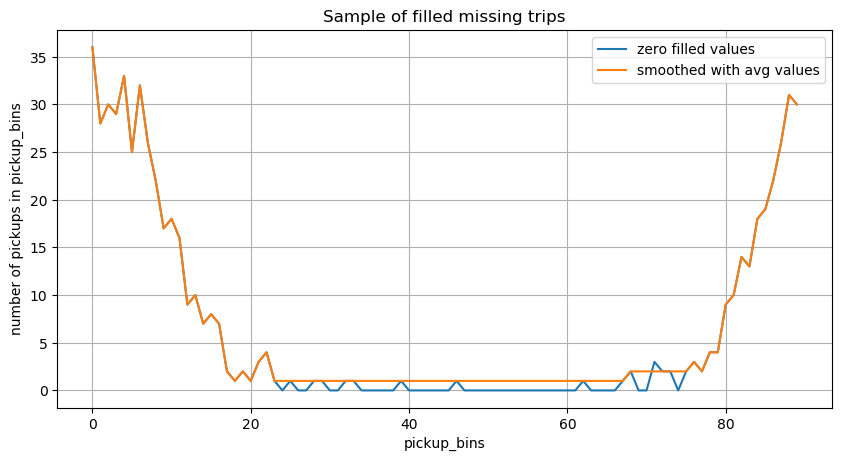

In [66]:
plt.figure(figsize=(10,5))
plt.plot(jan_2015_bin_counts_filled[3720 : 3810], label="zero filled values")
plt.plot(jan_2015_bin_counts_smoothed[3720 : 3810], label="smoothed with avg values")
plt.xlabel('pickup_bins' )
plt.ylabel('number of pickups in pickup_bins')
plt.title('Sample of filled missing trips')
plt.grid()
plt.legend()
plt.show()

__<font color='blue'> Why choose these two methods to fill the missing bins ?</font>__

* Consider FOUR 10 min intervals in which the number of pickups are 10, _, _, 20 repsectively.
* By using zero filling, these values become 10, 0, 0, 20.
* Uisng smoothing the values are distributed over the range with equal value. ie,. (30/4 ~= 7) ==> 7, 7, 7, 7.
* Using these two methods, the number of pickups over the 40 min interval is same in both the cases.
* __<font color='blue'> We only perform average smoothing on train_data as avg_smoothing on test_data will leak some future pickups.</font>__
* __<font color='blue'> For Test data, we simply use the zero filling method.</font>__

__<font color='blue'> FILLING THE MISSING BINS with 0's in TEST DATA</font>__

In [84]:
jan_2016_bin_counts_filled = fill_missing_bins(jan_2016_df_groupby.trip_distance.values, get_cluster_pickup_bins(jan_2016_df))
feb_2016_bin_counts_filled = fill_missing_bins(feb_2016_df_groupby.trip_distance.values, get_cluster_pickup_bins(feb_2016_df))
mar_2016_bin_counts_filled = fill_missing_bins(mar_2016_df_groupby.trip_distance.values, get_cluster_pickup_bins(mar_2016_df))

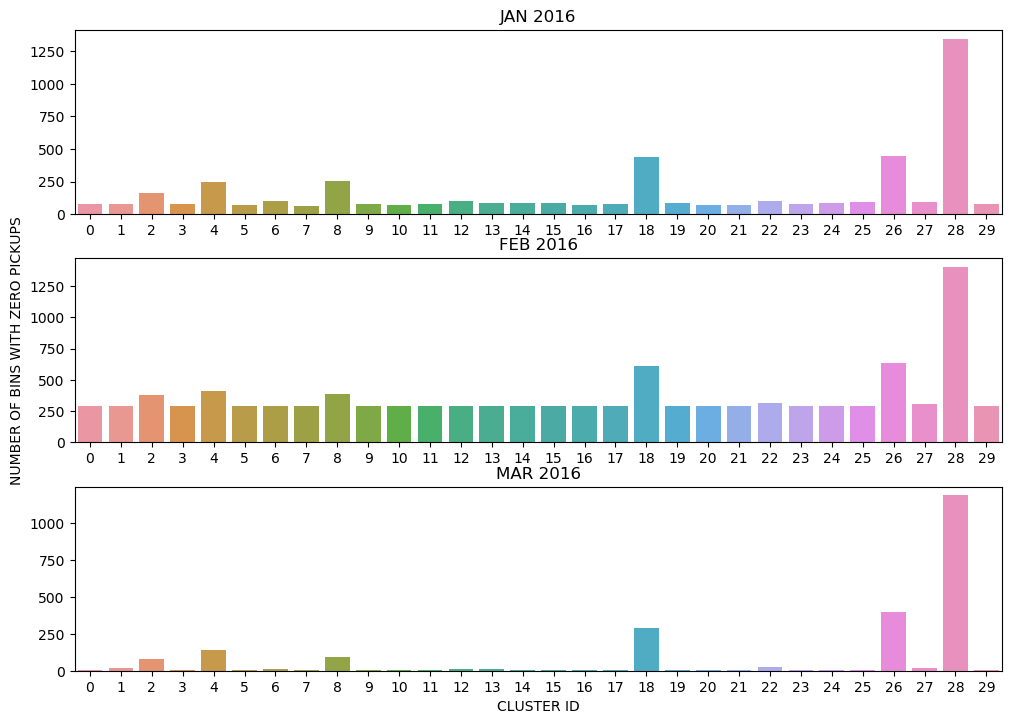

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 7))
fig.subplots_adjust(top=0.8)
fig.tight_layout()

sns.barplot(list(range(30)), get_num_zero_bins(get_cluster_pickup_bins(jan_2016_df)), ax=ax1)
ax1.set_title('JAN 2016')

sns.barplot(list(range(30)), get_num_zero_bins(get_cluster_pickup_bins(feb_2016_df)), ax=ax2)
ax2.set_title('FEB 2016')

sns.barplot(list(range(30)), get_num_zero_bins(get_cluster_pickup_bins(mar_2016_df)), ax=ax3)
ax3.set_title('MAR 2016')

ax3.set_xlabel('CLUSTER ID')
ax2.set_ylabel('NUMBER OF BINS WITH ZERO PICKUPS')

plt.show()

### 3.2.4 Time series and Fourier Transforms

__<font color='orange'> 1. NUMBER OF PICKUPS OVER THREE MONTHS FROM TEST DATA</font>__

In [88]:
months_combined_bin_counts = np.concatenate((jan_2016_bin_counts_filled.reshape(30, -1), 
                                             feb_2016_bin_counts_filled.reshape(30, -1),
                                             mar_2016_bin_counts_filled.reshape(30, -1)), axis=1)

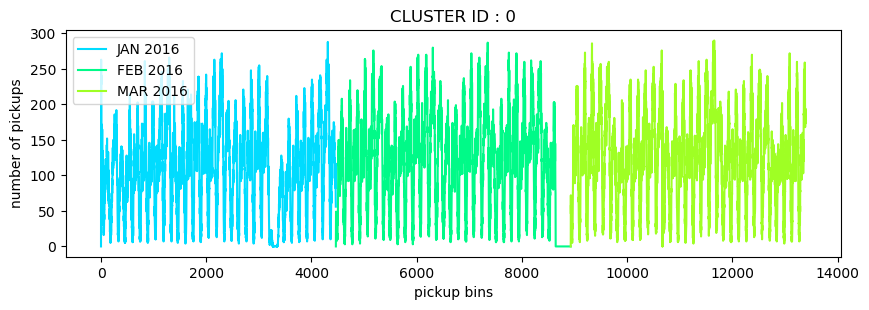

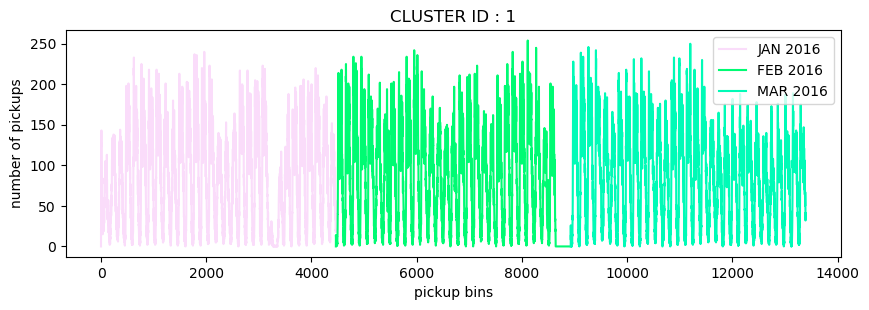

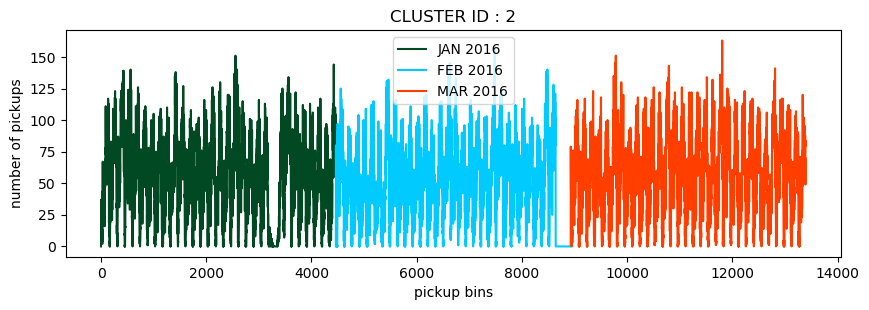

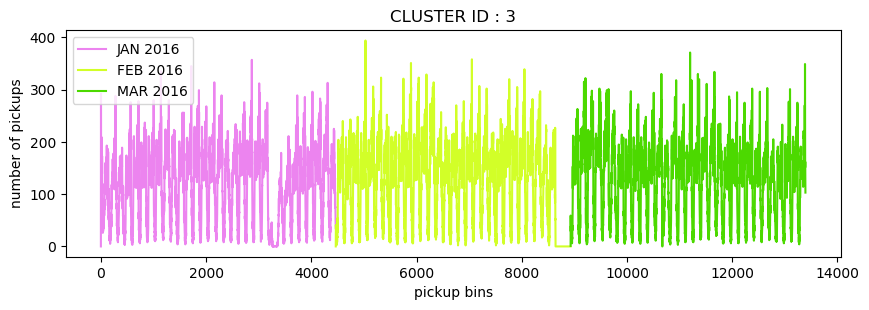

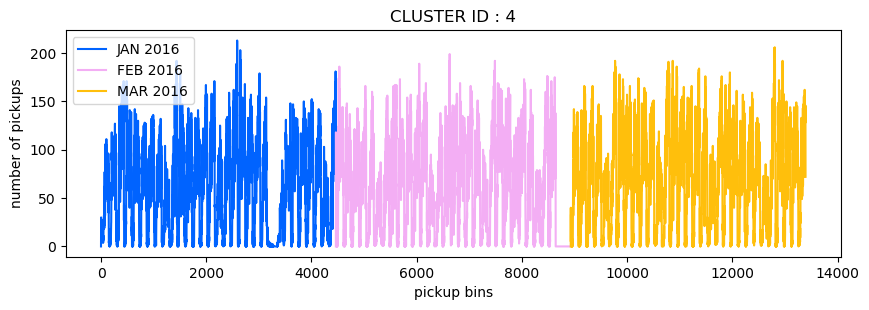

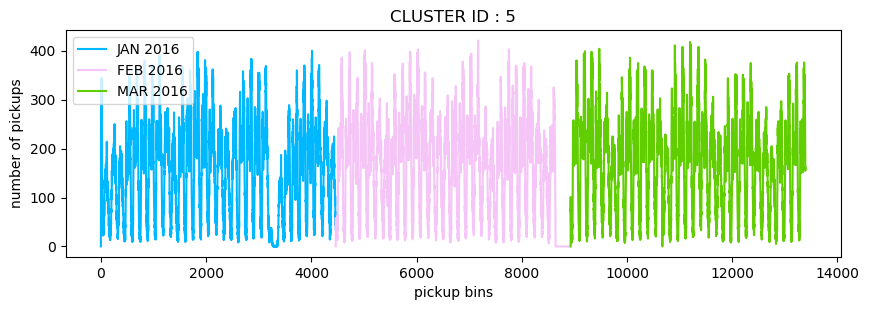

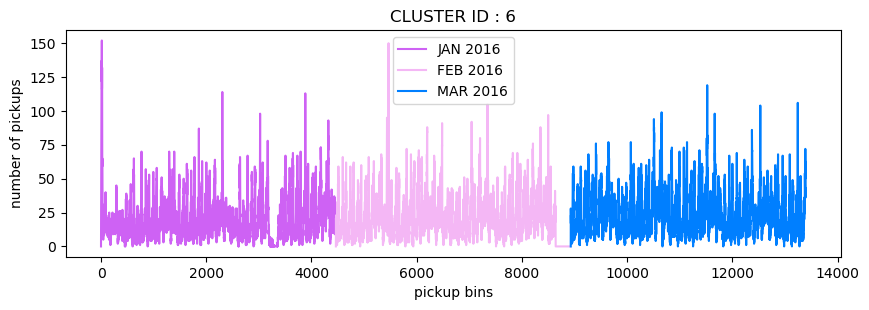

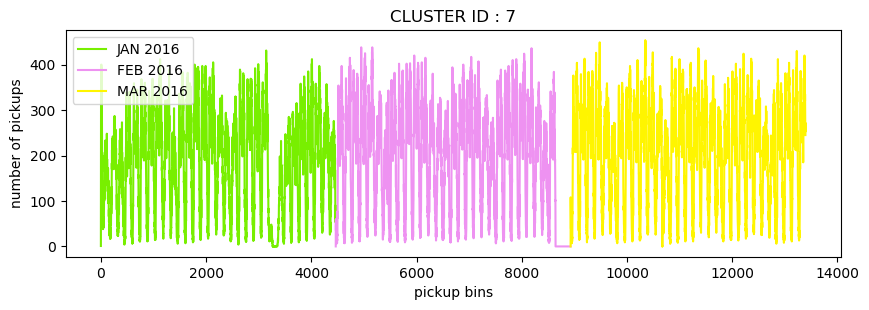

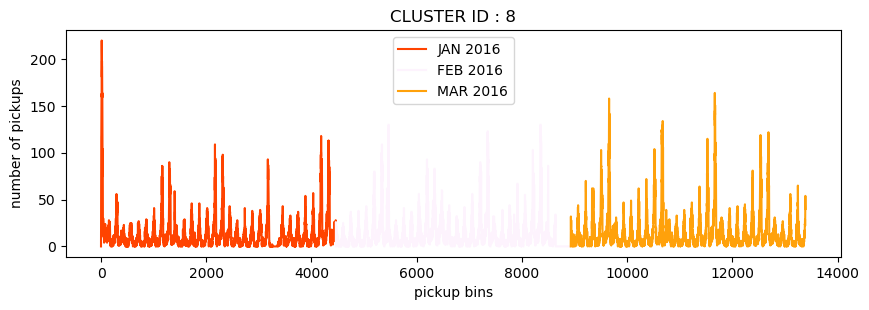

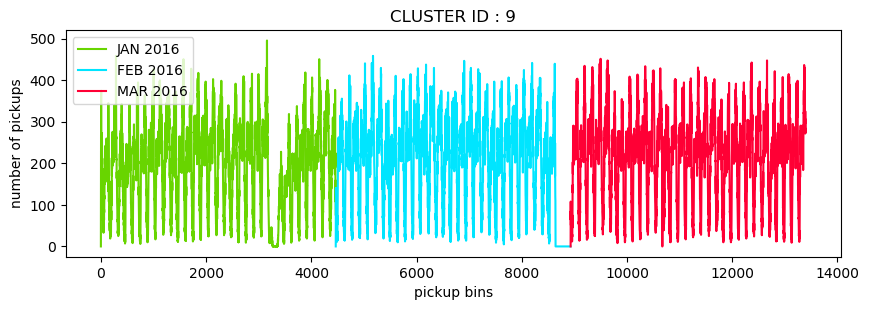

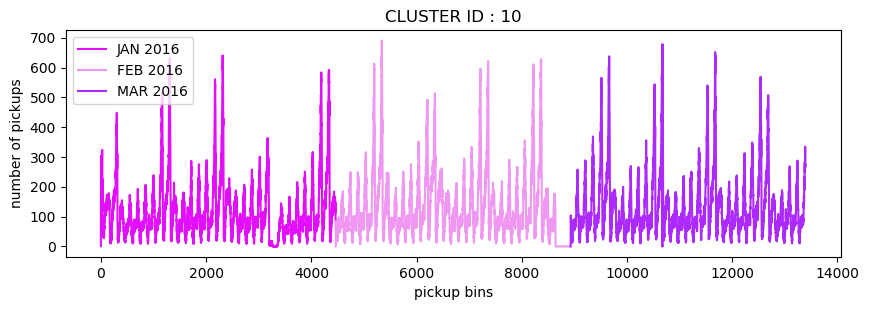

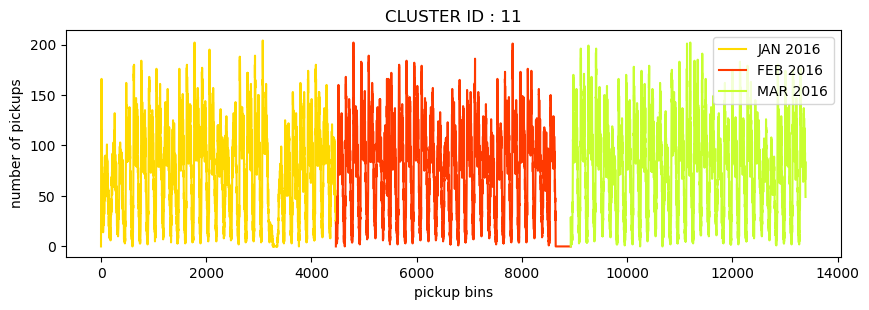

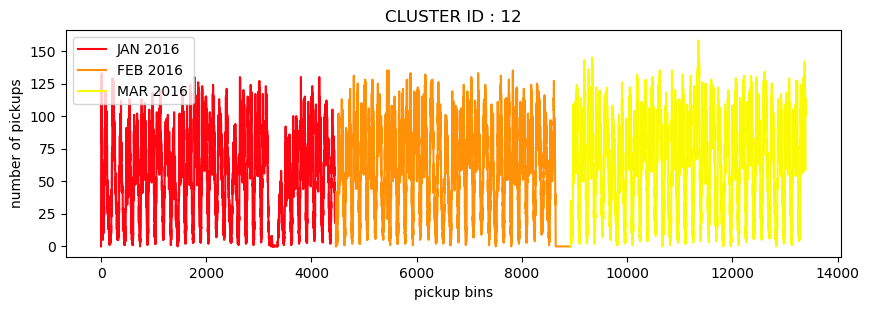

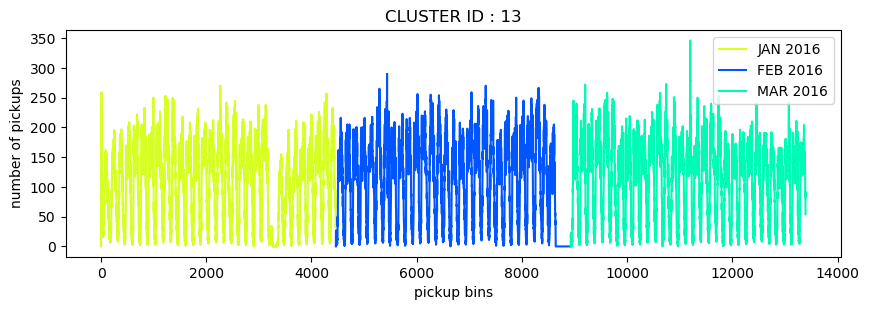

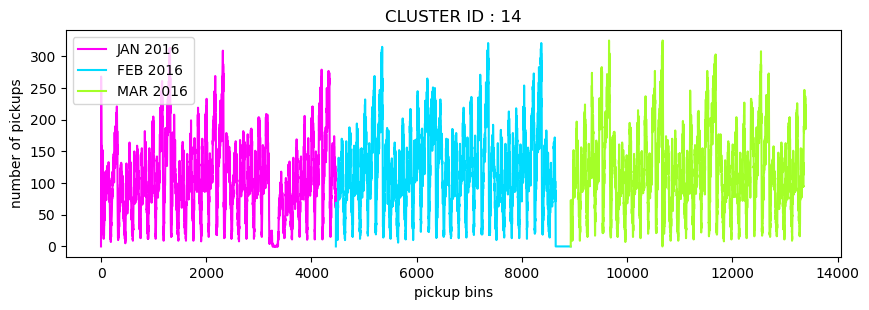

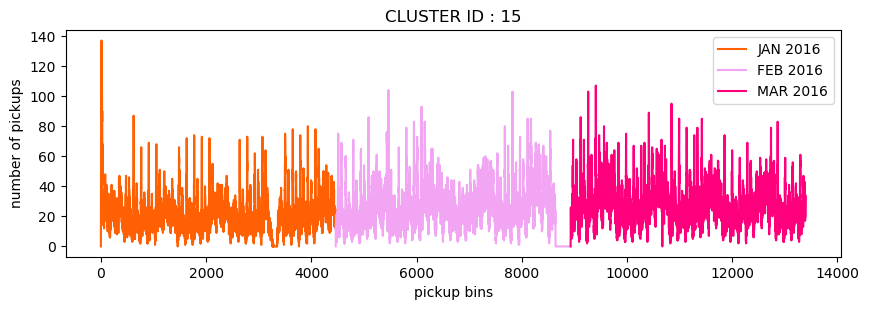

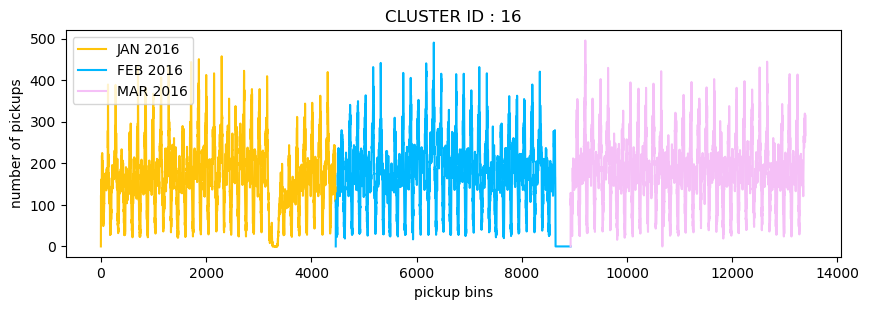

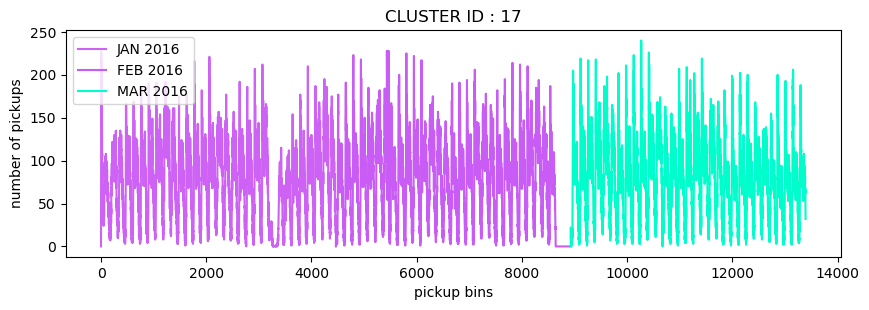

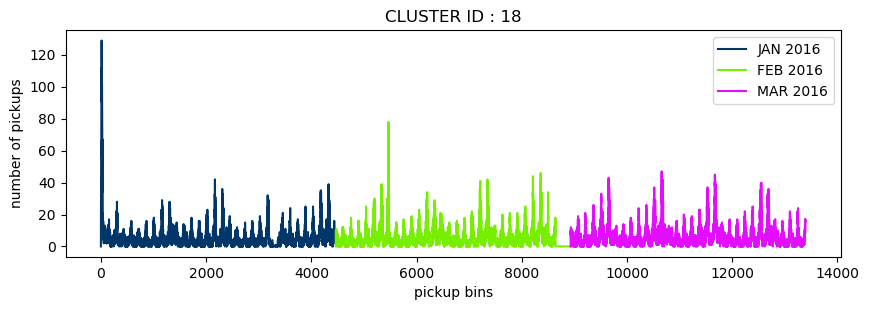

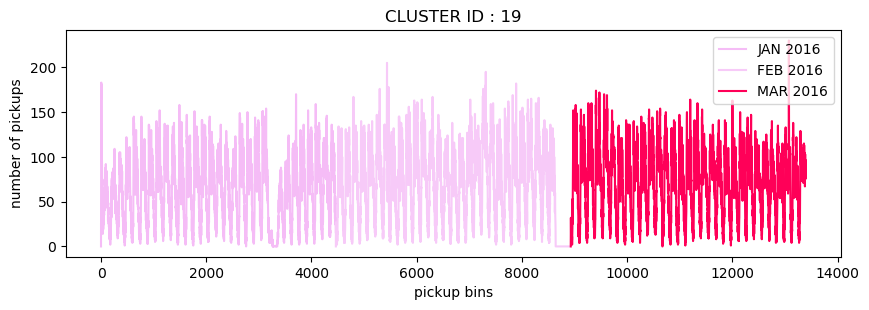

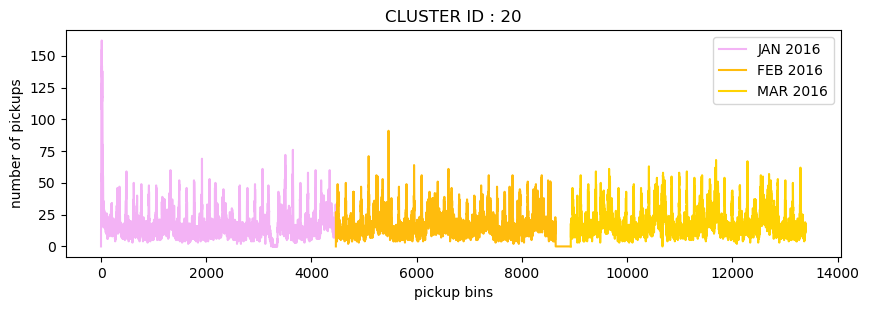

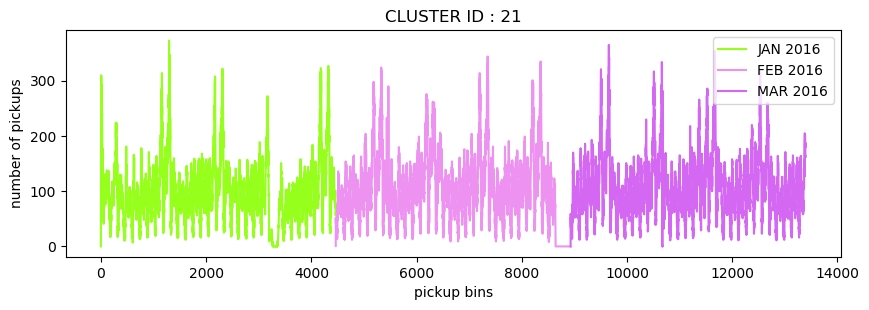

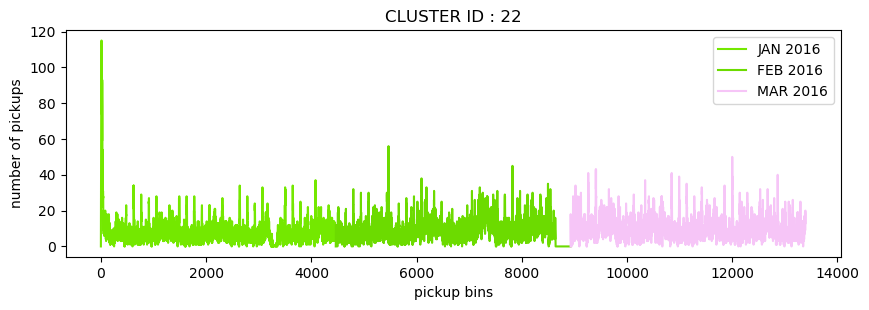

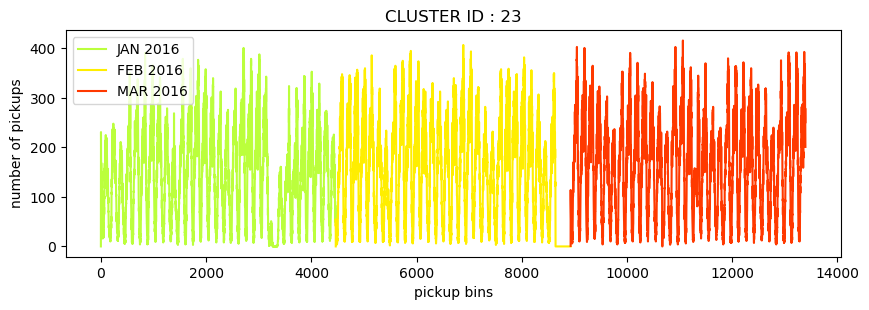

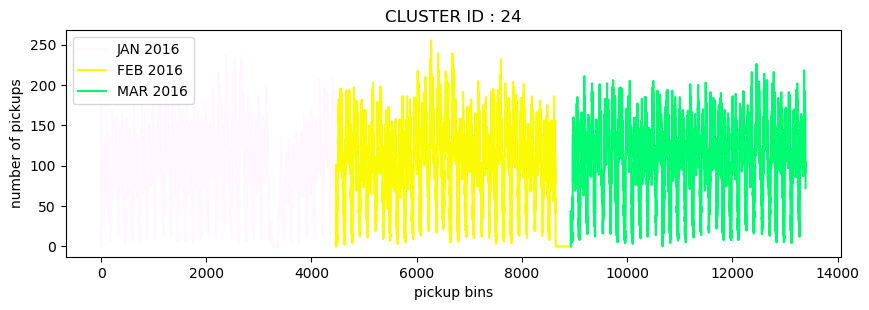

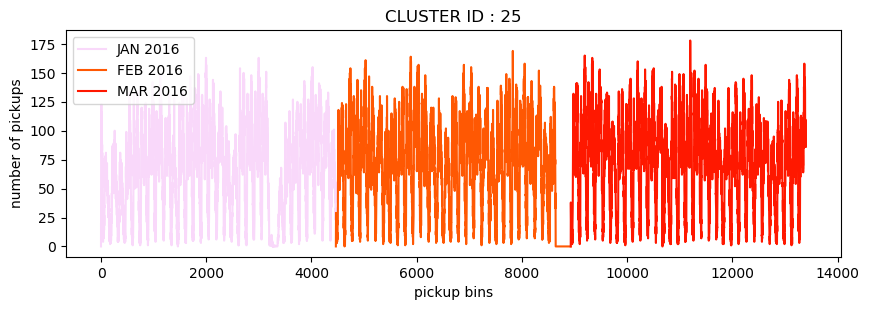

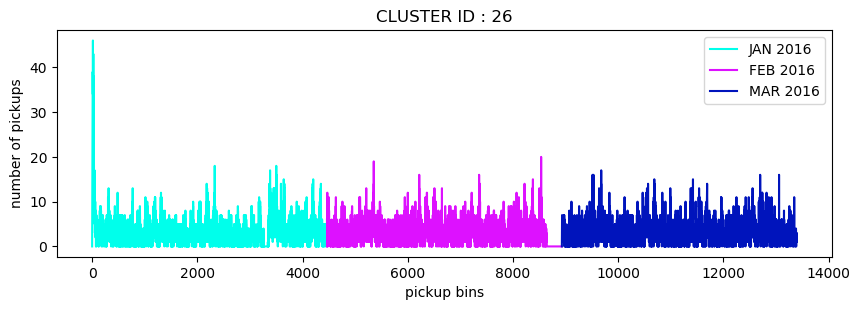

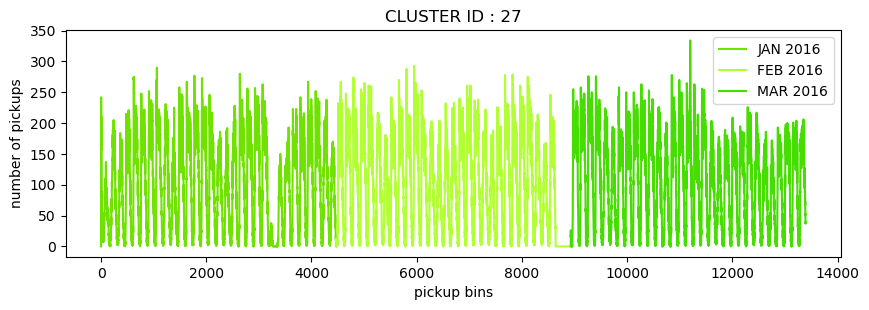

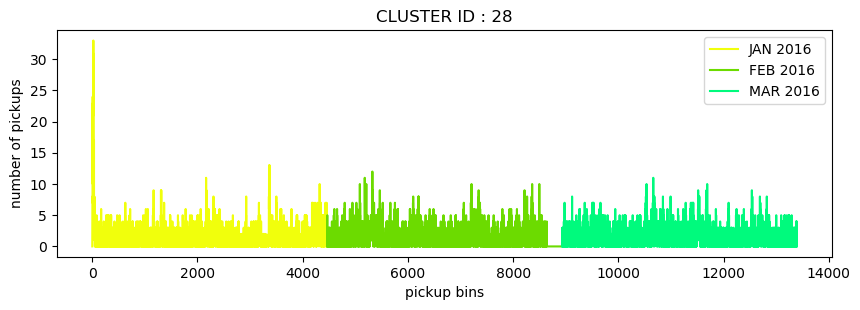

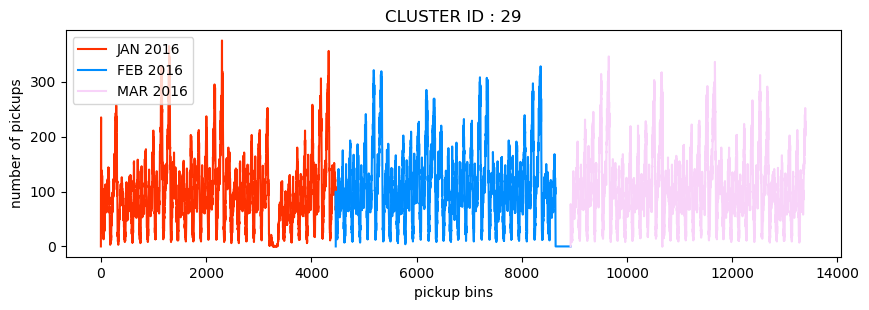

In [540]:
for cluster in range(num_clusters):
    plt.figure(figsize=(10, 3))
    plt.title(f'CLUSTER ID : {cluster}')
    for idx, month in enumerate(['JAN', 'FEB', 'MAR']):
        plt.plot(np.arange(num_time_bins*idx, num_time_bins*(idx+1)),
                 months_combined_bin_counts[cluster][num_time_bins*idx : num_time_bins*(idx+1)],
                 color=plt.cm.gist_ncar(np.random.random()),
                 label=f"{month} 2016")
    plt.xlabel('pickup bins')
    plt.ylabel('number of pickups')
    plt.legend()
    plt.show()
        
    

 __<font color='red'> OBSERVATIONS </font>__

* __<font color='blue'> This is great to see that the #pickups in a area/cluster in three different months are roughly the same.</font>__
* __<font color='blue'> The #pickups seem to be less in areas/clusters which are sparsely connected.</font>__
* __<font color='blue'> One intersting thing to notice is that the pattern of #pickups in each cluster is a repeating pattern.</font>__
* __<font color='blue'> Next We'll see how this property of repetition along the time can be useful in building the features.</font>__

__<font color='orange'> 2. FOURIER TRANSFORM</font>__


* <font color='#8E054D'>[Physics Videos by Eugene Khutoryansky : Fourier Transform, Fourier Series, and Frequency Spectrum](https://www.youtube.com/watch?reload=9&v=r18Gi8lSkfM)</font>


* In theory, any waveform can be represented as the sum of infinite sine waves. Each sine wave has some amplitude and frequency.

* We can see that the #pickups in a month in every cluster form a repeating pattern. We donot know the frequency of the repeating pattern.

* Our pattern cannot be represented by a single frequency as it's aperiodic. Instead it is composed of infinite sinewave with each sinewave having a frequency.

* Fourier transform lets us represent our pattern from time domain(#pickups per time) in frequency domain(can be viewed #pickup_bins with highest #pickups).

* For each cluster there exists a pattern, using the Fourier transform we can deduce the top frequencies and amplitudes of sine waves which compose our pattern from cluster and use them as features.

* The frequencies and amplitudes of a cluster are indicative of demand in that cluster. So they can be fed into the model for prediction of #pickups.

In [90]:
cluster = 22
amplitudes = np.abs(np.fft.fft(jan_2016_bin_counts_filled[num_time_bins*cluster: num_time_bins*(cluster+1)])) #return the amplitudes 
freqs = np.fft.fftfreq(num_time_bins, 1)
n = int(len(freqs) / 2)

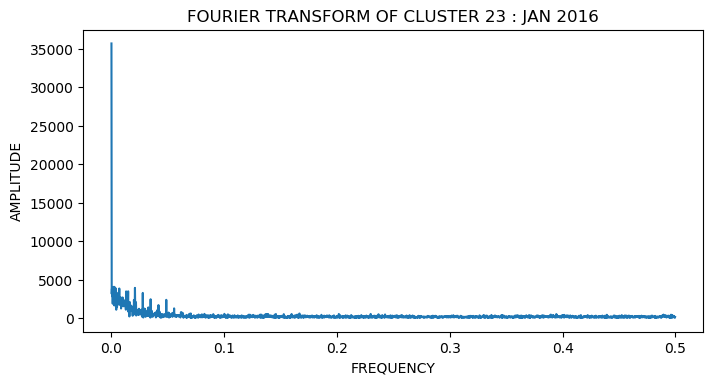

In [93]:
plt.figure(figsize=(8, 4))
plt.plot(freqs[:n], np.abs(amplitudes[:n]))
plt.xlabel('FREQUENCY')
plt.ylabel('AMPLITUDE')
plt.title(f'FOURIER TRANSFORM OF CLUSTER {cluster+1} : JAN 2016')
plt.show()

__<font color='blue'> INTERPRETATION</font>__

* __<font color='blue'> The following conclusion is based on my intuition and may not represent the actual facts.</font>__
* The X-axis and Y-axis represent the frequency and amplitude of the sinusoidal components respectively.
* The pattern whose repetition is very high will've a high frequency component and vice versa.
* As the #pickups will be high during the morning and evening, they'll have high frequencies. The same applies to day and night but with less frequencies.
* The X-axis frequencies can be viewed as 1-day intervals, 12-hour intervals, so on...
* __There is something interesting at f=0, it has very high amplitude. Let's unwind this.__
* As the frequency of a sine wave approaches zero, the sine wave tends to be axis-parallel/linear(appears as a DC component).
* The DC component is the bias(just a constant) of the wave. it is unclear whether the amplitude at f=0 is a sinusoidal component (or) DC component.
* If we consider that our pattern is roughly a periodic waveform, the average sinusoidal component will be zero then it's considered as DC component.

__<font color='red'> $ \hspace{5cm} Y = A + \sin(2\pi \cdot f \cdot t) $</font>__ <br><br>
$ \hspace{5cm} Y = \text{Amplitude of the resulting signal} $ <br>
$ \hspace{5cm} A = \text{Vertical offset (or) dc component (or) y-intercept } $ <br>
$ \hspace{5cm} f = \text{Frequency of the sinusoidal component} $ <br>
$ \hspace{5cm} f = \text{time} $ <br>

* The DC component is ambigious can be viewed as there are always some pickups at any time_interval(which may not be true in real world).
* We'll ignore the DC component and choose only the next 3 frequencies with higher amplitudes.

# 4. Modelling

Now we dive into modelling in order to forecast the pickup densities for the months of Jan, Feb and March of 2016 for which we are using multiple models with two variations.

* Using Ratios of the 2016 data to the 2015 data i.e $\begin{align} R_{t} = P^{2016}_{t} / P^{2015}_{t} \end{align}$
* Using Previous known pickups of the 2016 data itself to predict the future pickups.

In [462]:
ratios_jan_df = pd.DataFrame(list(zip(jan_2015_bin_counts_smoothed, jan_2016_bin_counts_filled)), columns=['P_2015', 'P_2016'])
ratios_jan_df['RATIOS'] = ratios_jan_df.P_2016 / ratios_jan_df.P_2015

In [463]:
ratios_feb_df = pd.DataFrame(feb_2016_bin_counts_filled, columns=['P_2016'])
ratios_mar_df = pd.DataFrame(mar_2016_bin_counts_filled, columns=['P_2016'])

In [464]:
ratios_jan_df.sample(1000).head(10)

,P_2015,P_2016,RATIOS
72029,30,25,0.833333
97688,135,123,0.911111
28083,63,48,0.761905
70177,58,10,0.172414
112603,77,81,1.051948
9724,43,30,0.697674
119659,4,6,1.500000
96048,359,308,0.857939
110671,172,82,0.476744
21292,33,34,1.030303


In [465]:
def mean_abs_per_error(y_true, y_pred):    
    return np.round((np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)), 4)

def mean_squared_error(y_true, y_pred):
    return np.round(np.mean(np.square(y_true - y_pred)), 4)

__DICT TO STORE THE MODELS PERFORMANCE__

In [466]:
baseline_results_dict = dict()

In [467]:
def plot_perf(error_dict, xlabel=None, title=None):
    
    X = list(error_dict.keys())
    Y = np.array(list(error_dict.values()))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    plt.tight_layout()
    ax1.plot(X, Y[:, 0], color='green')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('MAPE')
    ax1.set_title(f"MAPE of {title}")
    ax1.grid()
    ax1.set_xticks(X)
    
    ax2.plot(X, Y[:, 1], color='red')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('MSE')
    ax2.set_title(f"MSE of {title}")
    ax2.grid()
    ax2.set_xticks(X)
    
    plt.show()

## 4.1 Simple Moving Averges
The SMA model as the name suggests is a simple model which averages over some previous values to forecast the pickup densities.

### 4.1.1 SMA on Ratios

* The pickup density ($ P_{t+1}$) can be predicted as $\begin{align} P^{2016}_{t+1} = R_{t} \cdot P^{2015}_{t+1} \end{align}$.

* The ratio at time t ($ R_{t} $) can be written as $\begin{align}R_{t} = \frac{R_{t-1} + R_{t-2} + R_{t-3} + \dots + R_{t-n}}{n}  \end{align}$

* The value of ($n$) can be determined by tuning.

In [468]:
def sma_predict_on_ratios(ratios_df, window_size=3, num_time_bins=num_time_bins, tuning_mode=False):
    
    
    predicted_pickups = np.zeros((len(ratios_jan_df), ))
    
    for bin_num in range(len(ratios_df)):
        
        if (bin_num % num_time_bins == 0):
            predicted_pickups[bin_num] = 0
            
        for window in range(1, window_size):
            if (bin_num % num_time_bins) == window:
                end_idx = bin_num
                start_idx = max(0, bin_num - window)
                #print(start_idx, end_idx)
                predicted_pickups[bin_num] = int(ratios_df.RATIOS[start_idx : end_idx].mean() * ratios_df.P_2015[bin_num])
                break
                
        if bin_num % num_time_bins >= window_size:
            end_idx = bin_num
            start_idx = bin_num - window_size
            #print(start_idx, end_idx)
            predicted_pickups[bin_num] = int(ratios_df.RATIOS[start_idx : end_idx].mean() * ratios_df.P_2015[bin_num])
            
     #MAPE
    mape = mean_abs_per_error(ratios_df.P_2016, predicted_pickups)
    mse = mean_squared_error(ratios_df.P_2016, predicted_pickups)
    
    if tuning_mode:
        return mape, mse
    
    return predicted_pickups.astype(int), mape, mse

__<font color='green'> TUNING THE WINDOW SIZE </font>__

In [100]:
windows_range = np.arange(1, 11)
sma_ratios_err_dict = dict(zip(windows_range, list(map(lambda w : sma_predict_on_ratios(ratios_jan_df, window_size=w, tuning_mode=True),
                                                       windows_range))))

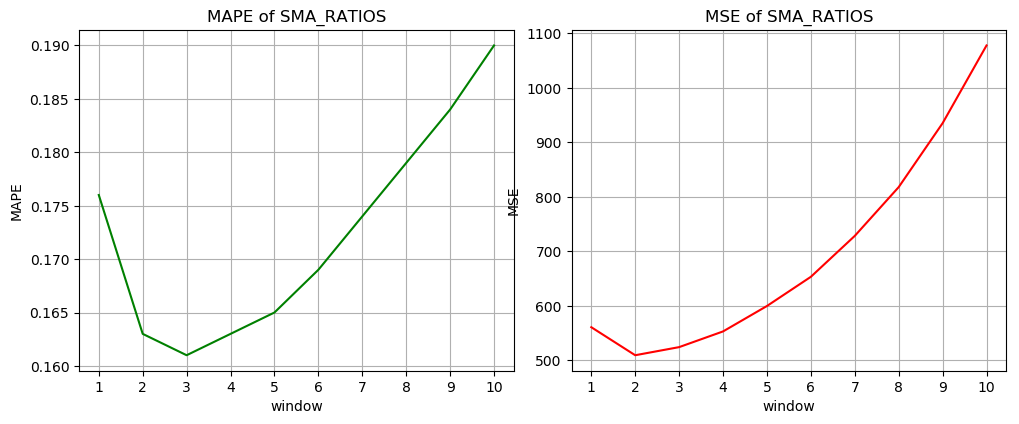

In [101]:
plot_perf(sma_ratios_err_dict, xlabel='window', title='SMA_RATIOS')

* __<font color='blue'> At window_size = 3, the MAPE is low </font>__

In [469]:
ratios_jan_df['SMA_RATIOS_PRED'], jan_mape_sma_ratios, jan_mse_sma_ratios = sma_predict_on_ratios(ratios_jan_df, window_size=3)

In [470]:
baseline_results_dict['SMA_RATIOS'] = [jan_mape_sma_ratios, jan_mse_sma_ratios]

In [471]:
ratios_jan_df.head(10)

,P_2015,P_2016,RATIOS,SMA_RATIOS_PRED
0,68,0,0.000000,0
1,68,106,1.558824,0
2,198,181,0.914141,154
3,281,263,0.935943,231
4,256,228,0.890625,290
5,252,241,0.956349,230
6,221,187,0.846154,205
7,201,147,0.731343,180
8,159,150,0.943396,134
9,134,158,1.179104,112


### 4.1.2 SMA on previous pickup densities.


* The pickup density at time t ($ P_{t} $) can be written as $\begin{align}P_{t} = \frac{P_{t-1} + P_{t-2} + P_{t-3} + \dots + P_{t-n}}{n}  \end{align}$

* The value of ($n$) can be determined by tuning.

In [472]:
def sma_predict_on_prev(ratios_df, window_size=None, num_time_bins=num_time_bins, tuning_mode=False):
    
    predicted_pickups = np.zeros((len(ratios_jan_df), ))
    
    for bin_num in range(len(ratios_df)):
        
        if (bin_num % num_time_bins == 0):
            predicted_pickups[bin_num] = 0
            
        for window in range(1, window_size):
            if (bin_num % num_time_bins) == window:
                end_idx = bin_num
                start_idx = max(0, bin_num - window)
                #print(start_idx, end_idx)
                predicted_pickups[bin_num] = int(ratios_df.P_2016[start_idx : end_idx].mean())
                break
                
        if bin_num % num_time_bins >= window_size:
            end_idx = bin_num
            start_idx = bin_num - window_size
            #print(start_idx, end_idx)
            predicted_pickups[bin_num] = int(ratios_df.P_2016[start_idx : end_idx].mean())
            
     #MAPE
    mape = mean_abs_per_error(ratios_df.P_2016, predicted_pickups)
    mse = mean_squared_error(ratios_df.P_2016, predicted_pickups)
    
    if tuning_mode:
        return mape, mse
    
    return predicted_pickups.astype(int), mape, mse

__<font color='green'> TUNING THE WINDOW_SIZE </font>__

In [106]:
windows_range = np.arange(1, 11)
sma_prev_err_dict = dict(zip(windows_range, list(map(lambda w : sma_predict_on_prev(ratios_jan_df, window_size=w, tuning_mode=True),
                                                     windows_range))))

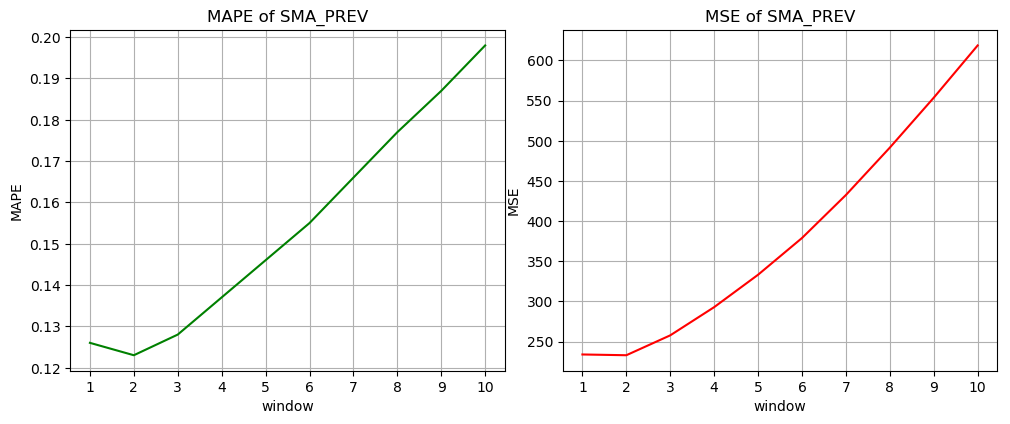

In [107]:
plot_perf(sma_prev_err_dict, xlabel='window', title='SMA_PREV')


* <font color='blue'> At window_size = 2 , the MAPE is low </font>

In [473]:
ratios_jan_df["SMA_PREV_PRED"], jan_mape_sma_prev, jan_mse_sma_prev = sma_predict_on_prev(ratios_jan_df, window_size=2)

In [474]:
baseline_results_dict['SMA_PREV'] = [jan_mape_sma_prev, jan_mse_sma_prev]

In [475]:
ratios_jan_df.head(10)

,P_2015,P_2016,RATIOS,SMA_RATIOS_PRED,SMA_PREV_PRED
0,68,0,0.000000,0,0
1,68,106,1.558824,0,0
2,198,181,0.914141,154,53
3,281,263,0.935943,231,143
4,256,228,0.890625,290,222
5,252,241,0.956349,230,245
6,221,187,0.846154,205,234
7,201,147,0.731343,180,214
8,159,150,0.943396,134,167
9,134,158,1.179104,112,148


## 4.2 Weighted Moving Averages

* The SMA method gives equal weight to all the prev ratios and prev pickup densities. 

* The idea of WMA is that we put the weight on the ration/pickup_density decreases with neighborhood.

* The future pickup_densities will be more similar to their latest pickup_densities rather than older ones.

* Weighted Averages converts this analogy into a mathematical relationship giving the highest weight while computing the averages to the latest previous value and decreasing weights to the subsequent older ones<br>

### 4.2.1 WMA on Ratios
WMA using Ratio : $\begin{align}R_{t} = \frac{N \cdot R_{t-1} + (N-1) \cdot R_{t-2} + (N-2)\cdot R_{t-3} + \dots  + 1 \cdot R_{t-n} }{N \cdot \frac{N+1}{2}} \end{align}$

In [477]:
def wma_predict_on_ratios(ratios_df, window_size=None, num_time_bins=num_time_bins, tuning_mode=False):
    
    predicted_pickups = np.zeros((len(ratios_jan_df), ))
    
    for bin_num in range(len(ratios_df)):
        
        if (bin_num % num_time_bins == 0):
            predicted_pickups[bin_num] = 0
            
        for window in range(1, window_size):
            if (bin_num % num_time_bins) == window:
                end_idx = bin_num
                start_idx = max(0, bin_num - window)
                N = end_idx - start_idx
                weights = np.arange(1, N+1)/(N*(N+1)*0.5)
                predicted_pickups[bin_num] = int((ratios_df.RATIOS[start_idx:end_idx]*weights).sum() * ratios_df.P_2015[bin_num])
                break
                
        if bin_num % num_time_bins >= window_size:
            end_idx = bin_num
            start_idx = bin_num - window_size
            #print(start_idx, end_idx)
            N = end_idx - start_idx
            weights = np.arange(1, N+1)/(N*(N+1)*0.5)
            predicted_pickups[bin_num] = int((ratios_df.RATIOS[start_idx:end_idx]*weights).sum() * ratios_df.P_2015[bin_num])
            
     #MAPE
    mape = mean_abs_per_error(ratios_df.P_2016, predicted_pickups)
    mse = mean_squared_error(ratios_df.P_2016, predicted_pickups)
    
    if tuning_mode:
        return mape, mse
    
    return predicted_pickups.astype(int), mape, mse
        

__<font color='green'> TUNING THE WINDOW_SIZE </font>__


In [112]:
windows_range = np.arange(1, 16)
wma_ratios_err_dict = dict(zip(windows_range, list(map(lambda w : wma_predict_on_ratios(ratios_jan_df, window_size=w, tuning_mode=True),
                                                       windows_range))))


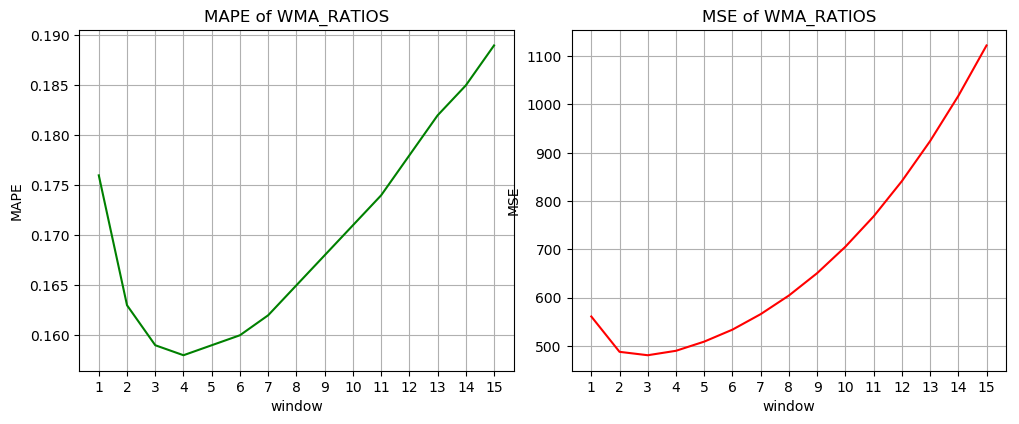

In [113]:
plot_perf(wma_ratios_err_dict, xlabel='window', title='WMA_RATIOS')

* <font color='blue'> At window_size =  4, the MAPE is low </font>

In [478]:
ratios_jan_df['WMA_RATIOS_PRED'], jan_mape_wma_ratios, jan_mse_wma_ratios = wma_predict_on_ratios(ratios_jan_df, window_size=4)

In [479]:
baseline_results_dict['WMA_RATIOS'] = [jan_mape_wma_ratios, jan_mse_wma_ratios]

In [480]:
ratios_jan_df.head(5)

,P_2015,P_2016,RATIOS,SMA_RATIOS_PRED,SMA_PREV_PRED,WMA_RATIOS_PRED
0,68,0,0.000000,0,0,0
1,68,106,1.558824,0,0,0
2,198,181,0.914141,154,53,205
3,281,263,0.935943,231,143,274
4,256,228,0.890625,290,222,245


### 4.2.2 WMA on previous pickup densities

* WMA using Previous 2016 Values:- $\begin{align}P_{t} = \frac{ N \cdot P_{t-1} + (N-1) \cdot P_{t-2} + (N-2) \cdot P_{t-3} .... 1 \cdot P_{t-n} }{N \cdot \frac{N+1}{2}} \end{align}$

In [481]:
def wma_predict_on_prev(ratios_df, window_size=None, num_time_bins=num_time_bins, tuning_mode=False):
    
    predicted_pickups = np.zeros((len(ratios_jan_df), ))
    
    for bin_num in range(len(ratios_df)):
        
        if (bin_num % num_time_bins == 0):
            predicted_pickups[bin_num] = 0
            
        #further optimization can be done by removing the loop
        for window in range(1, window_size):
            if (bin_num % num_time_bins) == window:
                end_idx = bin_num
                start_idx = max(0, bin_num - window)
                #print(start_idx, end_idx)
                N = end_idx - start_idx
                weights = np.arange(1, N+1)/(N*(N+1)*0.5)
                predicted_pickups[bin_num] = int((ratios_df.P_2016[start_idx:end_idx]*weights).sum())
                break
                
        if bin_num % num_time_bins >= window_size:
            end_idx = bin_num
            start_idx = bin_num - window_size
            #print(start_idx, end_idx)
            N = end_idx - start_idx
            weights = np.arange(1, N+1)/(N*(N+1)*0.5)
            predicted_pickups[bin_num] = int((ratios_df.P_2016[start_idx:end_idx]*weights).sum())
            
     #MAPE
    mape = mean_abs_per_error(ratios_df.P_2016, predicted_pickups)
    mse = mean_squared_error(ratios_df.P_2016, predicted_pickups)
    
    if tuning_mode:
        return mape, mse
    
    return predicted_pickups.astype(int), mape, mse

__<font color='green'> TUNING THE WINDOW_SIZE </font>__

In [118]:
windows_range = np.arange(1, 11)
wma_prev_err_dict = dict(zip(windows_range, list(map(lambda w : wma_predict_on_prev(ratios_jan_df, window_size=w, tuning_mode=True),
                                                       windows_range))))


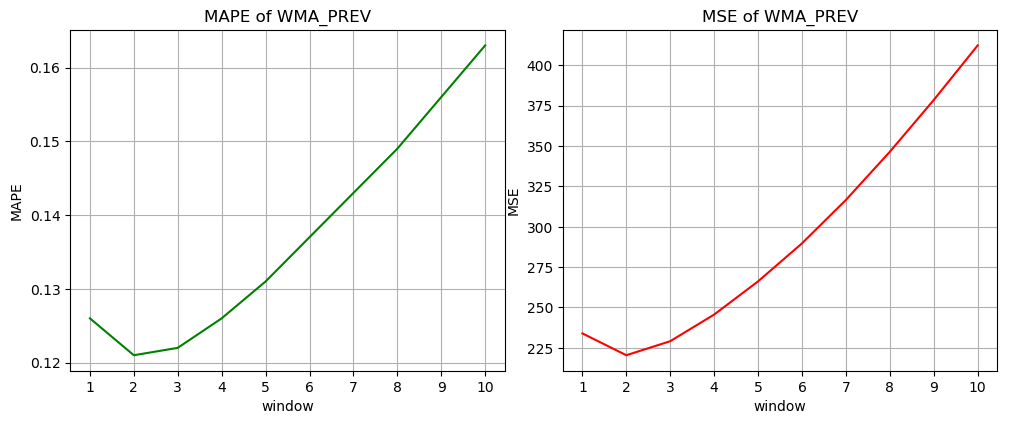

In [119]:
plot_perf(wma_prev_err_dict, xlabel='window', title='WMA_PREV')

* <font color='blue'> At window_size = 2, the MAPE is low </font>

In [482]:
ratios_jan_df['WMA_PREV_PRED'], jan_mape_wma_prev, jan_mse_wma_prev = wma_predict_on_prev(ratios_jan_df, window_size=2)

In [483]:
baseline_results_dict['WMA_PREV'] = [jan_mape_wma_prev, jan_mse_wma_prev]

In [484]:
ratios_jan_df.head(10)

,P_2015,P_2016,RATIOS,SMA_RATIOS_PRED,SMA_PREV_PRED,WMA_RATIOS_PRED,WMA_PREV_PRED
0,68,0,0.000000,0,0,0,0
1,68,106,1.558824,0,0,0,0
2,198,181,0.914141,154,53,205,70
3,281,263,0.935943,231,143,274,156
4,256,228,0.890625,290,222,245,235
5,252,241,0.956349,230,245,245,239
6,221,187,0.846154,205,234,205,236
7,201,147,0.731343,180,214,180,205
8,159,150,0.943396,134,167,131,160
9,134,158,1.179104,112,148,115,149


## 4.3 Exponential  Weighted Moving Averages

* [EMA](https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average)

* Through weighted averaged we have satisfied the analogy of giving higher weights to the latest value and decreasing weights to the subsequent ones 

* But we still do not know which is the correct weighting scheme as there are infinetly many possibilities in which we can assign weights in a non-increasing order and tune the the hyperparameter window-size.

* To simplify this process we use Exponential Moving Averages which is a more logical way towards assigning weights and at the same time also using an optimal window-size.

* In exponential moving averages we use a single hyperparameter alpha $\begin{align}(\alpha)\end{align}$ which is a value between 0 & 1 and based on the value of the hyperparameter alpha the weights and the window sizes are configured.

* For eg. If $\begin{align}\alpha=0.9\end{align}$ then the number of days on which the value of the current iteration is based is~$\begin{align}1/(1-\alpha)=10\end{align}$ i.e. we consider values 10 days prior before we predict the value for the current iteration. Also the weights are assigned using $\begin{align}2/(N+1)=0.18\end{align}$ ,where N = number of prior values being considered, hence from this it is implied that the first or latest value is assigned a weight of 0.18 which keeps exponentially decreasing for the subsequent values.


### 4.3.1 EMA on Ratios

* $\begin{align}R^{'}_{t} = \alpha \cdot R_{t-1} + (1-\alpha) \cdot R^{'}_{t-1}  \end{align}$

* $\begin{align}P_{t} = R^{'}_{t}  \cdot P^{2015}_{t}  \end{align}$

In [485]:
def ema_predict_on_ratios(ratios_df, alpha=None, num_time_bins=num_time_bins, tuning_mode=False):
    
    if not isinstance(alpha, (int, float)):
        raise Exception("Invalid value entered for alpha, please enter a value between 0 and 1")
        
    predicted_pickups = np.zeros((len(ratios_jan_df), ))
    predicted_ratios = predicted_pickups.copy()
    
    for bin_num in range(len(ratios_df)):
        
        if (bin_num % num_time_bins == 0):
            predicted_ratios[bin_num] = 0
            predicted_pickups[bin_num] = 0
            
        else:
            predicted_ratios[bin_num] = alpha*ratios_df.RATIOS[bin_num - 1] + (1 - alpha)*predicted_ratios[bin_num - 1]
            predicted_pickups[bin_num] = ratios_df.P_2015[bin_num] * predicted_ratios[bin_num]
        
        
     #MAPE, MSE
    mape = mean_abs_per_error(ratios_df.P_2016, predicted_pickups)
    mse = mean_squared_error(ratios_df.P_2016, predicted_pickups)
    
    if tuning_mode:
        return mape, mse
    
    return predicted_pickups.astype(int), mape, mse

__<font color='green'> TUNING THE VALUE OF alpha </font>__

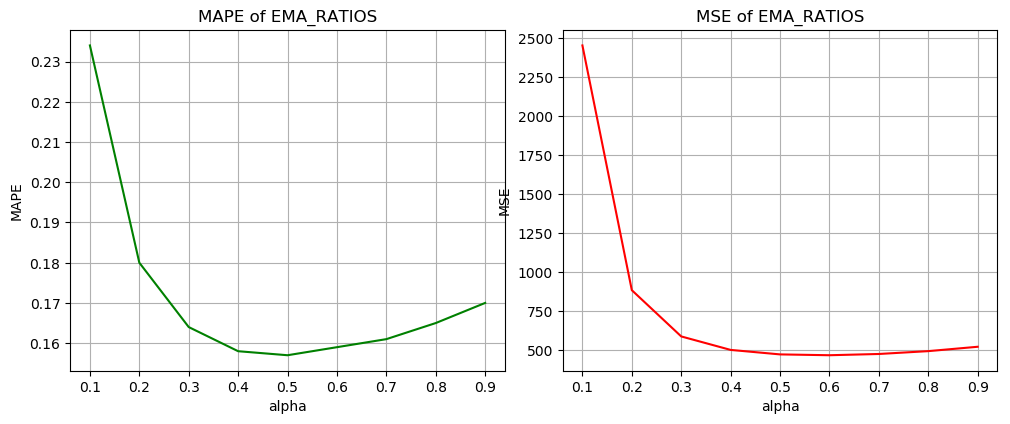

In [124]:
alpha_range = np.arange(0.1, 1, 0.1)
ema_ratios_err_dict = dict(zip(alpha_range, list(map(lambda a : ema_predict_on_ratios(ratios_jan_df, alpha=a, tuning_mode=True),
                                                       alpha_range))))

plot_perf(ema_ratios_err_dict, xlabel='alpha', title='EMA_RATIOS')

* <font color='blue'> At alpha = 0.5 , the MAPE is low </font>

In [486]:
ratios_jan_df['EMA_RATIOS_PRED'], jan_mape_ema_ratios, jan_mse_ema_ratios = ema_predict_on_ratios(ratios_jan_df, alpha=0.5)

In [487]:
baseline_results_dict['EMA_RATIOS'] = [jan_mape_ema_ratios, jan_mse_ema_ratios]

In [488]:
ratios_jan_df.head(10)

,P_2015,P_2016,RATIOS,SMA_RATIOS_PRED,SMA_PREV_PRED,WMA_RATIOS_PRED,WMA_PREV_PRED,EMA_RATIOS_PRED
0,68,0,0.000000,0,0,0,0,0
1,68,106,1.558824,0,0,0,0,0
2,198,181,0.914141,154,53,205,70,154
3,281,263,0.935943,231,143,274,156,237
4,256,228,0.890625,290,222,245,235,228
5,252,241,0.956349,230,245,245,239,224
6,221,187,0.846154,205,234,205,236,204
7,201,147,0.731343,180,214,180,205,177
8,159,150,0.943396,134,167,131,160,128
9,134,158,1.179104,112,148,115,149,117


### 4.3.2 EMA on previous pickup densities

* $\begin{align}P^{'}_{t} = \alpha \cdot P_{t-1} + (1-\alpha) \cdot P^{'}_{t-1}  \end{align}$

In [489]:
def ema_predict_on_prev(ratios_df, alpha=None, num_time_bins=num_time_bins, tuning_mode=False):
    
    if not isinstance(alpha, (int, float)):
        raise Exception("Invalid value entered for alpha, please enter a value between 0 and 1")
        
    predicted_pickups = np.zeros((len(ratios_jan_df), ))
    
    for bin_num in range(len(ratios_df)):
        
        if (bin_num % num_time_bins == 0):
            predicted_pickups[bin_num] = 0
            
        else:
            predicted_pickups[bin_num] = alpha*ratios_df.P_2016[bin_num - 1] + (1 - alpha)*predicted_pickups[bin_num - 1]
        
        
     #MAPE, MSE
    mape = mean_abs_per_error(ratios_df.P_2016, predicted_pickups)
    mse = mean_squared_error(ratios_df.P_2016, predicted_pickups)
    
    if tuning_mode:
        return mape, mse
    
    return predicted_pickups.astype(int), mape, mse

__<font color='green'> TUNING THE VALUE OF alpha </font>__

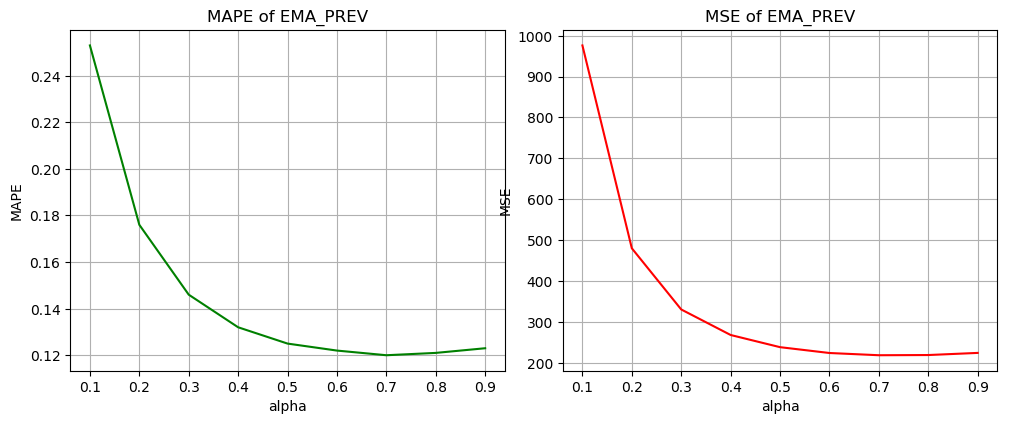

In [129]:
alpha_range = np.arange(0.1, 1, 0.1)
ema_prev_err_dict = dict(zip(alpha_range, list(map(lambda a : ema_predict_on_prev(ratios_jan_df, alpha=a, tuning_mode=True),
                                                       alpha_range))))
plot_perf(ema_prev_err_dict, xlabel='alpha', title='EMA_PREV')

* <font color='blue'> At alpha =  0.5, the MAPE is low </font>

In [490]:
ratios_jan_df['EMA_PREV_PRED'], jan_mape_ema_prev, jan_mse_ema_prev = ema_predict_on_prev(ratios_jan_df, alpha=0.7)

In [491]:
baseline_results_dict['EMA_PREV'] = [jan_mape_ema_prev, jan_mse_ema_prev]

In [492]:
ratios_jan_df.head(10)

,P_2015,P_2016,RATIOS,SMA_RATIOS_PRED,SMA_PREV_PRED,WMA_RATIOS_PRED,WMA_PREV_PRED,EMA_RATIOS_PRED,EMA_PREV_PRED
0,68,0,0.000000,0,0,0,0,0,0
1,68,106,1.558824,0,0,0,0,0,0
2,198,181,0.914141,154,53,205,70,154,74
3,281,263,0.935943,231,143,274,156,237,148
4,256,228,0.890625,290,222,245,235,228,228
5,252,241,0.956349,230,245,245,239,224,228
6,221,187,0.846154,205,234,205,236,204,237
7,201,147,0.731343,180,214,180,205,177,202
8,159,150,0.943396,134,167,131,160,128,163
9,134,158,1.179104,112,148,115,149,117,154


## 4.4 Comparison between baseline models

* We have chosen our error metric for comparison between models as <b>MAPE (Mean Absolute Percentage Error)</b> so that we can know that on an average how good is our model with predictions and <b>MSE (Mean Squared Error)</b> is also used so that we have a clearer understanding as to how well our forecasting model performs with outliers so that we make sure that there is not much of a error margin between our prediction and the actual value.

In [493]:
pd.DataFrame.from_dict(baseline_results_dict, orient='index', columns=['MAPE', 'MSE']).sort_values(['MAPE', 'MSE'])

,MAPE,MSE
EMA_PREV,0.1205,218.6057
WMA_PREV,0.1206,220.4236
SMA_PREV,0.1231,232.9855
EMA_RATIOS,0.1574,473.4599
WMA_RATIOS,0.1580,489.5664
SMA_RATIOS,0.1613,524.1292


__<font color='red'> The above comparisons are made using Jan 2015 and Jan 2016 only</font>__

* From the above error_df,  the best forecasting model for our prediction is __<font color='green'> Exponential Weighted Moving Averages using Previous Pickup_denstities</font>__

In [494]:
ratios_feb_df['EMA_PREV_PRED'], _, _ = ema_predict_on_prev(ratios_feb_df, alpha=0.7)

In [495]:
ratios_mar_df['EMA_PREV_PRED'], _, _ = ema_predict_on_prev(ratios_mar_df, alpha=0.7)

## 4.5 Regression Models

* Till now, we've exploited the time series property of the data to use time series models. Now we'll completely discard the time series property and pose this as a regression problem.

### 4.5.1 Building the features

* For that we will've to build features to train the models. Below are the list of 14 selected features.
    - Latitude and Longitude of the cluster : 2
    - Top three amplitudes with respective frequencies from fourier transform : 6
    - Five previous pickup_densities from the cluster where the pickup_density is to be predicted : 5
    - The pickup_density predicted by the EMA_PREV baseline model : 1

In [164]:
def get_prev_pickups(bin_counts, bin_num, num_f=5):
    
    if bin_num < num_f:
        return np.concatenate((np.zeros((num_f - bin_num, )), bin_counts[max(0, bin_num - num_f) : bin_num]))
    
    else:
        return  bin_counts[bin_num - num_f : bin_num]

In [165]:
def get_fourier_features(bin_counts, num_clusters=num_clusters, num_time_bins=num_time_bins):
    
    freqs = np.fft.fftfreq(num_time_bins, 1)
    n = int(len(freqs) / 2)
    amps = np.abs(np.fft.fft(bin_counts)[:n])
    top_amps = amps.argsort()[::-1][1:4] #pick the top3 amps excluding the dc component
    
    return np.concatenate((amps[top_amps], freqs[top_amps]))
        

In [325]:
def build_data_matrix(bin_counts,\
                      baseline_pred,\
                      cluster_centers=cluster_centers):          
    
    data = []
    columns = ['LAT', 'LON', 'AMP1', 'AMP2', 'AMP3', 'FREQ1', 'FREQ2', 'FREQ3', 'P5', 'P4', 'P3', 'P2', 'P1', 'EMA_PRED']
    for cluster in range(len(cluster_centers)):
        
        current_cluster_range = np.arange(num_time_bins*cluster, num_time_bins*(cluster+1))
        
        cluster_center = cluster_centers[cluster]
        cluster_fourier_feat = get_fourier_features(bin_counts[current_cluster_range])
        #print(current_cluster_range[[0, -1]])
        for bin_num in range(num_time_bins):
            
            
            data.append(np.concatenate((cluster_center,\
                                        cluster_fourier_feat,\
                                        get_prev_pickups(bin_counts[current_cluster_range], bin_num),\
                                        [baseline_pred[current_cluster_range].values[bin_num]])).reshape(1, -1))
            
    return pd.DataFrame(np.concatenate((data), axis=0).astype(np.float32), columns=columns)
    

In [326]:
jan_2016_features = build_data_matrix(bin_counts=jan_2016_bin_counts_filled, baseline_pred=ratios_jan_df.EMA_PREV_PRED)

In [327]:
feb_2016_features = build_data_matrix(bin_counts=feb_2016_bin_counts_filled, baseline_pred=ratios_feb_df.EMA_PREV_PRED)

In [328]:
mar_2016_features = build_data_matrix(bin_counts=mar_2016_bin_counts_filled, baseline_pred=ratios_mar_df.EMA_PREV_PRED)

### 4.5.2 Train and Test split

* It is to be noted that we split the data by time.
* The train and test sizes are 70% : 20% respectively.

In [353]:
print(f"Total number of pickup_bins in a cluster      : {num_time_bins}")
print("-"*55)
print(f'Number of train pickup_bins from each cluster : {int(np.round(num_time_bins * 0.7))}')
print(f'Number of test pickup_bins from each cluster  : {int(np.round(num_time_bins * 0.3))}')

Total number of pickup_bins in a cluster      : 4464
-------------------------------------------------------
Number of train pickup_bins from each cluster : 3125
Number of test pickup_bins from each cluster  : 1339


* <font color='blue'> The number of pickup_densities in a set will be </font> __<font color='red'> pickup_bins_from_each_cluster * number_of_clusters * number_of_months </font>__.

In [355]:
train_size, test_size = 0.7, 0.3
num_train_bins = int(np.round(num_time_bins * train_size))
num_test_bins = int(np.round(num_time_bins * test_size))

train_bin_indices= np.arange(0, num_train_bins)
test_bin_indices = np.arange(num_train_bins, num_train_bins+num_test_bins)

In [359]:
cols = train_2016_features.columns
train_2016_features = pd.DataFrame(columns=cols)
test_2016_features = train_2016_features.copy()

train_labels = []
test_labels = []

In [360]:
for cluster in range(num_clusters):
    #print(f'cluster : {cluster}')
    
    train_range = (num_time_bins*cluster) + train_bin_indices
    test_range = (num_time_bins*cluster) + test_bin_indices
    
    train_2016_features = train_2016_features.append(pd.concat((jan_2016_features.iloc[train_range],\
                                                                feb_2016_features.iloc[train_range],\
                                                                mar_2016_features.iloc[train_range])))
    
    train_labels.append(np.concatenate((jan_2016_bin_counts_filled[train_range],\
                                        feb_2016_bin_counts_filled[train_range],\
                                        mar_2016_bin_counts_filled[train_range])))
    
    
    test_2016_features = test_2016_features.append(pd.concat((jan_2016_features.iloc[test_range],\
                                                              feb_2016_features.iloc[test_range],\
                                                              mar_2016_features.iloc[test_range])))
    
    test_labels.append(np.concatenate((jan_2016_bin_counts_filled[test_range],\
                                       feb_2016_bin_counts_filled[test_range],\
                                       mar_2016_bin_counts_filled[test_range])))

In [361]:
train_labels = np.concatenate((train_labels))
test_labels = np.concatenate((test_labels))

In [362]:
print(f"shape of train : {train_2016_features.shape}")
print(f"shape of test  : {test_2016_features.shape}")

shape of train : (281250, 14)
shape of test  : (120510, 14)


In [ ]:
"""
train_2016_features.to_csv('train_2016_features.csv', index=False)
test_2016_features.to_csv('test_2016_features.csv', index=False)

with open('train_labels.npy', 'wb') as f:
    np.save(f, train_labels)
    
with open('test_labels.npy', 'wb') as f:
    np.save(f, test_labels)
"""

* __<font color='red'> Discard all the values with pickup_densities == 0. </font>__
* __<font color='red'> The initial pickup densities in each cluster have this property. </font>__

In [365]:
train_zeros = np.all(train_2016_features[['P5', 'P4', 'P3', 'P2', 'P1']] == 0, axis=1)
test_zeros = np.all(test_2016_features[['P5', 'P4', 'P3', 'P2', 'P1']] == 0, axis=1)

In [366]:
train_2016_features = train_2016_features[~train_zeros]
train_labels = train_labels[~train_zeros]

test_2016_features = test_2016_features[~test_zeros]
test_labels = test_labels[~test_zeros]

In [367]:
train_2016_features.head()

,LAT,LON,AMP1,AMP2,AMP3,FREQ1,FREQ2,FREQ3,P5,P4,P3,P2,P1,EMA_PRED
2,40.733543,-73.991486,130399.585938,62330.636719,45587.714844,0.006944,0.013889,0.012993,0.0,0.0,0.0,0.0,106.0,74.0
3,40.733543,-73.991486,130399.585938,62330.636719,45587.714844,0.006944,0.013889,0.012993,0.0,0.0,0.0,106.0,181.0,148.0
4,40.733543,-73.991486,130399.585938,62330.636719,45587.714844,0.006944,0.013889,0.012993,0.0,0.0,106.0,181.0,263.0,228.0
5,40.733543,-73.991486,130399.585938,62330.636719,45587.714844,0.006944,0.013889,0.012993,0.0,106.0,181.0,263.0,228.0,228.0
6,40.733543,-73.991486,130399.585938,62330.636719,45587.714844,0.006944,0.013889,0.012993,106.0,181.0,263.0,228.0,241.0,237.0


In [434]:
def print_feature_importances(feat_imps):
    
    feat_df = pd.DataFrame.from_dict(dict(zip(cols, np.round(feat_imps, 5))), orient='index', columns=['feature_importance'])
    return feat_df.sort_values(by='feature_importance', ascending=False)

In [370]:
models_result_dict = {}

### 4.5.3  Linear Regression

In [513]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [521]:
X_scaler = StandardScaler().fit(train_2016_features)
train_2016_features_std = X_scaler.transform(train_2016_features)
test_2016_features_std = X_scaler.transform(test_2016_features)

c:\program files\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [524]:
linear_reg_gridsearch = GridSearchCV(SGDRegressor(),
                                     param_grid={'alpha' : np.logspace(-6, 3, 10)},
                                     scoring='neg_mean_absolute_error',
                                     cv=3)

linear_reg_gridsearch.fit(train_2016_features_std, train_labels)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [525]:
linear_reg_gridsearch.best_params_

{'alpha': 0.0001}

In [526]:
linear_reg = SGDRegressor(alpha=0.0001).fit(train_2016_features_std, train_labels)
linear_reg_preds = linear_reg.predict(test_2016_features_std)

In [527]:
lin_reg_mape = mean_abs_per_error(test_labels, linear_reg_preds)
lin_reg_mse = mean_squared_error(test_labels, linear_reg_preds)

models_result_dict['LINEAR_REGRESSION'] = [lin_reg_mape, lin_reg_mse]

In [528]:
print(f" TRAIN MAPE : {mean_abs_per_error(train_labels, linear_reg.predict(train_2016_features_std))}")
print(f" TRAIN MSE  : {mean_squared_error(train_labels, linear_reg.predict(train_2016_features_std))}")
print()
print(f" TEST MAPE : {lin_reg_mape}")
print(f" TEST MSE  : {lin_reg_mse}")

 TRAIN MAPE : 0.1175
 TRAIN MSE  : 238.5128

 TEST MAPE : 0.1165
 TEST MSE  : 218.275


In [537]:
print_feature_importances(linear_reg.coef_.ravel())

,feature_importance
P1,39.89843
EMA_PRED,30.23170
P2,11.46369
P3,5.68041
AMP2,0.71622
AMP1,0.34452
AMP3,0.31442
FREQ1,0.15620
LAT,0.11563
FREQ3,-0.01975


### 4.5.4 Random Forest Regression

In [380]:
from sklearn.ensemble import RandomForestRegressor

In [393]:
parameters = {'n_estimators' : [10, 20, 40, 80],
              'max_depth' : [2, 3, 4],
              'min_samples_leaf' : [4, 8, 12],
              'min_samples_split' : [4, 8, 12]
             }

In [394]:
rf_random_cv_clf = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1),
                                      param_distributions=parameters,
                                      scoring='neg_mean_absolute_error',
                                      cv=5)
rf_random_cv_clf.fit(train_2016_features, train_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [10, 20, 40, 80], 'max_depth': [2, 3, 4], 'min_samples_leaf': [4, 8, 12], 'min_samples_split': [4, 8, 12]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [395]:
rf_random_cv_clf.best_params_

{'n_estimators': 20,
 'min_samples_split': 4,
 'min_samples_leaf': 8,
 'max_depth': 4}

In [416]:
rf_reg = RandomForestRegressor(n_jobs=-1, n_estimators=20, max_depth=4, min_samples_leaf=8, min_samples_split=4)
rf_reg.fit(train_2016_features, train_labels)
rf_reg_preds = rf_reg.predict(test_2016_features)

In [417]:
rf_reg_mape = mean_abs_per_error(test_labels, rf_reg_preds)
rf_reg_mse = mean_squared_error(test_labels, rf_reg_preds)

models_result_dict['RANDOM_FORESTS_REG'] = [rf_reg_mape, rf_reg_mse]

In [418]:
print(f" TRAIN MAPE : {mean_abs_per_error(train_labels, rf_reg.predict(train_2016_features))}")
print(f" TRAIN MSE  : {mean_squared_error(train_labels, rf_reg.predict(train_2016_features))}")
print()
print(f" TEST MAPE : {rf_reg_mape}")
print(f" TEST MSE  : {rf_reg_mse}")

 TRAIN MAPE : 0.1266
 TRAIN MSE  : 272.4468

 TEST MAPE : 0.1261
 TEST MSE  : 250.1323


In [436]:
print_feature_importances(rf_reg.feature_importances_.ravel())

,feature_importance
EMA_PRED,0.97279
P1,0.02721
LAT,0.00000
LON,0.00000
AMP1,0.00000
AMP2,0.00000
AMP3,0.00000
FREQ1,0.00000
FREQ2,0.00000
FREQ3,0.00000


### 4.5.4 Xgboost Regression

In [206]:
import xgboost as xgb

In [450]:
parameters = {'n_estimators' : [10, 20, 40, 80, 150],
              'max_depth' : [2, 3, 4],
              'min_child_weight' : [2, 3, 4, 5, 6],
              'learning_rate' : [0.1, 0.3,  0.5, 0.7,  0.9],
              'colsample_bytree' : [0.5, 0.75, 1]
             }

In [451]:
xgb_random_cv = RandomizedSearchCV(xgb.XGBRegressor(),
                                   param_distributions=parameters,
                                   scoring='neg_mean_absolute_error',
                                   cv=3)
xgb_random_cv.fit(train_2016_features, train_labels)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [10, 20, 40, 80, 150], 'max_depth': [2, 3, 4], 'min_child_weight': [2, 3, 4, 5, 6], 'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9], 'colsample_bytree': [0.5, 0.75, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [452]:
xgb_random_cv.best_params_

{'n_estimators': 80,
 'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.1,
 'colsample_bytree': 0.75}

In [453]:
xgb_reg = xgb.XGBRegressor(learning_rate=0.1, 
                           n_estimators=80, 
                           max_depth=4, 
                           min_child_weight=3, 
                           colsample_bytree=0.75,
                           n_jobs=-1)

xgb_reg.fit(train_2016_features, train_labels)
xgb_reg_preds = xgb_reg.predict(test_2016_features)

In [454]:
xgb_reg_mape = mean_abs_per_error(test_labels, xgb_reg_preds)
xgb_reg_mse = mean_squared_error(test_labels, xgb_reg_preds)

models_result_dict['XGBOOST_REG'] = [xgb_reg_mape, xgb_reg_mse]

In [455]:
print(f" TRAIN MAPE : {mean_abs_per_error(train_labels, xgb_reg.predict(train_2016_features))}")
print(f" TRAIN MSE  : {mean_squared_error(train_labels, xgb_reg.predict(train_2016_features))}")
print()
print(f" TEST MAPE : {xgb_reg_mape}")
print(f" TEST MSE  : {xgb_reg_mse}")

 TRAIN MAPE : 0.1151
 TRAIN MSE  : 225.9773

 TEST MAPE : 0.1158
 TEST MSE  : 213.0978


In [456]:
print_feature_importances(xgb_reg.feature_importances_.ravel())

,feature_importance
EMA_PRED,0.23379
P1,0.19795
P2,0.12713
P5,0.11177
P3,0.06997
P4,0.06399
LAT,0.04437
LON,0.04266
AMP1,0.04181
AMP2,0.03925


# 5. Conclusion

In [535]:
pd.DataFrame.from_dict(models_result_dict, orient='index', columns=['TEST_MAPE', 'TEST_MSE']).sort_values(['TEST_MAPE', 'TEST_MSE'])

,TEST_MAPE,TEST_MSE
XGBOOST_REG,0.1158,213.0978
LINEAR_REGRESSION,0.1165,218.2750
EMA_PREV,0.1205,218.6057
WMA_PREV,0.1206,220.4236
SMA_PREV,0.1231,232.9855
RANDOM_FORESTS_REG,0.1261,250.1323
EMA_RATIOS,0.1574,473.4599
WMA_RATIOS,0.1580,489.5664
SMA_RATIOS,0.1613,524.1292


* W've built a total of nine regression models using the pickup_densities. Some models used the time series property while the other models ignored it and was treated as a proper regression problem.
* Out of which 6 of the models, moving  averaging models were built using only Jan 2015 and Jan 2016 pickup densities.
* The other three models were built using [Jan, Feb, Mar] 2016 pickup densities.
* The results came out pretty well, Even Linear Regression was able to achieve a similar MAPE to XGBoost.
* Out the features we engineered, the most weighted feature/the feature which had most impact on the outcome was the __pickup_density ($ P_{t-1}$)__ followed by the __EMA Model using previous pickup_densities.__